In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
from tqdm import tqdm
import xgboost as xgb
import tensorflow as tf
import cv2
from keras_applications.resnet import ResNet50
# from keras.applications.resnet18 import ResNet18
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input, decode_predictions
from keras.layers import Flatten, Input
from tensorflow.keras.utils import img_to_array, load_img
import scipy
from sklearn.metrics import fbeta_score
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost
import glob

In [2]:
files = []
categories = []

for directory_path in glob.glob('C:/Users/Natalie/Desktop/Project/Alzheimer_s Dataset_1/train/*'):

    label=directory_path.split('\\')[-1]
    
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        files.append(img_path)
        categories.append(label)

df = pd.DataFrame({
 'Filename': files,
 'Category': categories
})

df

Filename          Category
0     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
1     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
2     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
3     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
4     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
...                                                 ...               ...
5116  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented
5117  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented
5118  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented
5119  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented
5120  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented

[5121 rows x 2 columns]

In [3]:
df['Category'].value_counts()

NonDemented         2560
VeryMildDemented    1792
MildDemented         717
ModerateDemented      52
Name: Category, dtype: int64

In [4]:
le = preprocessing.LabelEncoder()
le.fit(df['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}


In [5]:
y = le.transform(df['Category'])

In [6]:
base_model = VGG16(weights='imagenet', include_top=False)
inputs = Input(shape=(48,48,3),name = 'image_input')
x = base_model(inputs)
x = Flatten()(x)
model = Model(inputs=inputs, outputs=x)

In [7]:
import time
start = time.time()

x_train = []
y_train = []

for f in tqdm(df.Filename[:]):
    img_path = f
    img = load_img(img_path, target_size=(48, 48))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    features_reduce =  features.squeeze()
    x_train.append(features_reduce)

  0%|          | 0/5121 [00:00<?, ?it/s]

1/1 [==============================] - 0s 277ms/step


  0%|          | 1/5121 [00:00<28:48,  2.96it/s]

1/1 [==============================] - 0s 31ms/step


  0%|          | 3/5121 [00:00<11:20,  7.52it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 5/5121 [00:00<08:14, 10.35it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 7/5121 [00:00<06:56, 12.27it/s]

1/1 [==============================] - 0s 29ms/step


  0%|          | 9/5121 [00:00<06:24, 13.30it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 11/5121 [00:00<05:56, 14.32it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 13/5121 [00:01<05:43, 14.88it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 15/5121 [00:01<05:37, 15.11it/s]

1/1 [==============================] - 0s 29ms/step


  0%|          | 17/5121 [00:01<05:32, 15.35it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 19/5121 [00:01<05:27, 15.56it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 21/5121 [00:01<05:30, 15.45it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 23/5121 [00:01<05:29, 15.47it/s]

1/1 [==============================] - 0s 29ms/step


  0%|          | 25/5121 [00:01<05:27, 15.55it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 27/5121 [00:01<05:25, 15.66it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 29/5121 [00:02<05:22, 15.77it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 31/5121 [00:02<05:21, 15.82it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 33/5121 [00:02<05:23, 15.73it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 35/5121 [00:02<05:23, 15.71it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 37/5121 [00:02<05:25, 15.63it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 39/5121 [00:02<05:28, 15.46it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 41/5121 [00:02<05:29, 15.44it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 43/5121 [00:02<05:28, 15.44it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 45/5121 [00:03<05:17, 15.97it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 47/5121 [00:03<05:12, 16.23it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 49/5121 [00:03<05:06, 16.55it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 51/5121 [00:03<05:03, 16.68it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 53/5121 [00:03<05:01, 16.81it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 55/5121 [00:03<04:57, 17.04it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 57/5121 [00:03<04:55, 17.13it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 59/5121 [00:03<04:50, 17.40it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 61/5121 [00:04<04:52, 17.30it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 63/5121 [00:04<04:49, 17.48it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▏         | 65/5121 [00:04<04:47, 17.56it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▏         | 67/5121 [00:04<04:46, 17.61it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▏         | 69/5121 [00:04<04:49, 17.42it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▏         | 71/5121 [00:04<04:49, 17.47it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▏         | 73/5121 [00:04<04:46, 17.60it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▏         | 75/5121 [00:04<04:47, 17.56it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 77/5121 [00:04<04:55, 17.08it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 79/5121 [00:05<05:05, 16.51it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 81/5121 [00:05<04:59, 16.82it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 83/5121 [00:05<04:53, 17.17it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 85/5121 [00:05<04:52, 17.21it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 87/5121 [00:05<04:52, 17.23it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 89/5121 [00:05<04:50, 17.29it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 91/5121 [00:05<04:46, 17.56it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 93/5121 [00:05<04:46, 17.57it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 95/5121 [00:05<04:42, 17.76it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 97/5121 [00:06<04:44, 17.66it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 99/5121 [00:06<04:43, 17.69it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 101/5121 [00:06<04:42, 17.79it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 103/5121 [00:06<04:42, 17.77it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 105/5121 [00:06<04:44, 17.63it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 107/5121 [00:06<04:42, 17.76it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 109/5121 [00:06<04:43, 17.68it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 111/5121 [00:06<04:42, 17.74it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 113/5121 [00:07<04:42, 17.70it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 115/5121 [00:07<04:46, 17.48it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 117/5121 [00:07<04:44, 17.61it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 119/5121 [00:07<04:43, 17.65it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 121/5121 [00:07<04:42, 17.68it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 123/5121 [00:07<04:43, 17.60it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 125/5121 [00:07<04:44, 17.54it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 127/5121 [00:07<04:41, 17.74it/s]

1/1 [==============================] - 0s 30ms/step


  3%|▎         | 129/5121 [00:07<04:43, 17.60it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 131/5121 [00:08<04:41, 17.74it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 133/5121 [00:08<04:43, 17.60it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 135/5121 [00:08<04:41, 17.74it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 137/5121 [00:08<04:42, 17.65it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 139/5121 [00:08<04:41, 17.68it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 141/5121 [00:08<04:45, 17.47it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 143/5121 [00:08<04:44, 17.50it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 145/5121 [00:08<04:44, 17.46it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 147/5121 [00:08<04:43, 17.55it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 149/5121 [00:09<04:42, 17.63it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 151/5121 [00:09<04:42, 17.59it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 153/5121 [00:09<04:44, 17.45it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 155/5121 [00:09<04:43, 17.52it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 157/5121 [00:09<04:42, 17.59it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 159/5121 [00:09<04:42, 17.54it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 161/5121 [00:09<04:41, 17.60it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 163/5121 [00:09<04:42, 17.55it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 165/5121 [00:09<04:45, 17.38it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 167/5121 [00:10<04:43, 17.47it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 169/5121 [00:10<04:44, 17.41it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 171/5121 [00:10<04:41, 17.60it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 173/5121 [00:10<04:38, 17.74it/s]

1/1 [==============================] - 0s 27ms/step


  3%|▎         | 175/5121 [00:10<04:37, 17.84it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 177/5121 [00:10<04:39, 17.67it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 179/5121 [00:10<04:38, 17.76it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▎         | 181/5121 [00:10<04:39, 17.68it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 183/5121 [00:10<04:40, 17.63it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 185/5121 [00:11<04:40, 17.60it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 187/5121 [00:11<04:40, 17.59it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▎         | 189/5121 [00:11<04:38, 17.69it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▎         | 191/5121 [00:11<04:37, 17.77it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 193/5121 [00:11<04:36, 17.81it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 195/5121 [00:11<04:38, 17.70it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 197/5121 [00:11<04:37, 17.76it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 199/5121 [00:11<04:34, 17.90it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 201/5121 [00:11<04:34, 17.92it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 203/5121 [00:12<04:32, 18.02it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 205/5121 [00:12<04:34, 17.89it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 207/5121 [00:12<04:36, 17.76it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 209/5121 [00:12<04:33, 17.95it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 211/5121 [00:12<04:36, 17.76it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 213/5121 [00:12<04:37, 17.71it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 215/5121 [00:12<04:36, 17.74it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 217/5121 [00:12<04:37, 17.65it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 219/5121 [00:13<04:40, 17.45it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 221/5121 [00:13<04:37, 17.63it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 223/5121 [00:13<04:37, 17.66it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 225/5121 [00:13<04:36, 17.69it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 227/5121 [00:13<04:37, 17.66it/s]

1/1 [==============================] - 0s 27ms/step


  4%|▍         | 229/5121 [00:13<04:36, 17.69it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▍         | 231/5121 [00:13<04:41, 17.38it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▍         | 233/5121 [00:13<04:39, 17.49it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 235/5121 [00:13<04:37, 17.63it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 237/5121 [00:14<04:34, 17.81it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▍         | 239/5121 [00:14<04:35, 17.73it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▍         | 241/5121 [00:14<04:35, 17.69it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 243/5121 [00:14<04:32, 17.92it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 245/5121 [00:14<04:29, 18.09it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 247/5121 [00:14<04:29, 18.08it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▍         | 249/5121 [00:14<04:35, 17.69it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▍         | 251/5121 [00:14<04:34, 17.71it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▍         | 253/5121 [00:14<04:33, 17.82it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▍         | 255/5121 [00:15<04:34, 17.70it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 257/5121 [00:15<04:33, 17.76it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 259/5121 [00:15<04:35, 17.62it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 261/5121 [00:15<04:37, 17.52it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▌         | 263/5121 [00:15<04:39, 17.40it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 265/5121 [00:15<04:49, 16.80it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▌         | 267/5121 [00:15<04:59, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▌         | 269/5121 [00:15<04:58, 16.26it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▌         | 271/5121 [00:16<04:57, 16.29it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▌         | 273/5121 [00:16<04:55, 16.40it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 275/5121 [00:16<04:51, 16.61it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▌         | 277/5121 [00:16<04:58, 16.24it/s]

1/1 [==============================] - 0s 29ms/step


  5%|▌         | 279/5121 [00:16<04:54, 16.42it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 281/5121 [00:16<04:51, 16.59it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 283/5121 [00:16<04:55, 16.38it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 285/5121 [00:16<04:59, 16.16it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 287/5121 [00:16<04:56, 16.32it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 289/5121 [00:17<04:55, 16.33it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 291/5121 [00:17<04:56, 16.28it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 293/5121 [00:17<04:55, 16.35it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 295/5121 [00:17<04:58, 16.14it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 297/5121 [00:17<05:00, 16.05it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 299/5121 [00:17<04:57, 16.19it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 301/5121 [00:17<04:53, 16.44it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 303/5121 [00:17<04:54, 16.36it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 305/5121 [00:18<04:53, 16.38it/s]

1/1 [==============================] - 0s 30ms/step


  6%|▌         | 307/5121 [00:18<04:55, 16.32it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 309/5121 [00:18<04:55, 16.28it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 311/5121 [00:18<04:58, 16.09it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 313/5121 [00:18<04:58, 16.12it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▌         | 315/5121 [00:18<05:02, 15.86it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 317/5121 [00:18<05:02, 15.87it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 319/5121 [00:18<04:59, 16.04it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▋         | 321/5121 [00:19<04:55, 16.25it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▋         | 323/5121 [00:19<04:45, 16.80it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▋         | 325/5121 [00:19<04:40, 17.10it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▋         | 327/5121 [00:19<04:35, 17.38it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▋         | 329/5121 [00:19<04:33, 17.51it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▋         | 331/5121 [00:19<04:36, 17.31it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 333/5121 [00:19<04:37, 17.26it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 335/5121 [00:19<04:33, 17.49it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 337/5121 [00:19<04:34, 17.43it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 339/5121 [00:20<04:35, 17.34it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 341/5121 [00:20<04:33, 17.51it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 343/5121 [00:20<04:32, 17.53it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 345/5121 [00:20<04:31, 17.62it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 347/5121 [00:20<04:30, 17.66it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 349/5121 [00:20<04:32, 17.50it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 351/5121 [00:20<04:31, 17.57it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 353/5121 [00:20<04:29, 17.72it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 355/5121 [00:21<04:26, 17.87it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 357/5121 [00:21<04:29, 17.67it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 359/5121 [00:21<04:28, 17.74it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 361/5121 [00:21<04:27, 17.79it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 363/5121 [00:21<04:29, 17.63it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 365/5121 [00:21<04:28, 17.71it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 367/5121 [00:21<04:32, 17.45it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 369/5121 [00:21<04:35, 17.26it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 371/5121 [00:21<04:44, 16.71it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 373/5121 [00:22<04:46, 16.56it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 375/5121 [00:22<04:47, 16.53it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 377/5121 [00:22<04:40, 16.93it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 379/5121 [00:22<04:35, 17.21it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 381/5121 [00:22<04:34, 17.28it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 383/5121 [00:22<04:29, 17.55it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 385/5121 [00:22<04:29, 17.57it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 387/5121 [00:22<04:30, 17.48it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 389/5121 [00:22<04:27, 17.70it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 391/5121 [00:23<04:27, 17.71it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 393/5121 [00:23<04:29, 17.54it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 395/5121 [00:23<04:27, 17.69it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 397/5121 [00:23<04:29, 17.52it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 399/5121 [00:23<04:28, 17.59it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 401/5121 [00:23<04:28, 17.59it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 403/5121 [00:23<04:42, 16.69it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 405/5121 [00:23<04:38, 16.91it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 407/5121 [00:24<04:36, 17.02it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 409/5121 [00:24<04:35, 17.12it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 411/5121 [00:24<04:35, 17.08it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 413/5121 [00:24<04:32, 17.28it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 415/5121 [00:24<04:30, 17.37it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 417/5121 [00:24<04:28, 17.53it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 419/5121 [00:24<04:27, 17.59it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 421/5121 [00:24<04:38, 16.88it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 423/5121 [00:24<04:34, 17.13it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 425/5121 [00:25<04:32, 17.24it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 427/5121 [00:25<04:29, 17.39it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 429/5121 [00:25<04:28, 17.50it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 431/5121 [00:25<04:25, 17.66it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 433/5121 [00:25<04:24, 17.74it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 435/5121 [00:25<04:22, 17.88it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▊         | 437/5121 [00:25<04:22, 17.86it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▊         | 439/5121 [00:25<04:30, 17.32it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▊         | 441/5121 [00:25<04:31, 17.26it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▊         | 443/5121 [00:26<04:28, 17.41it/s]

1/1 [==============================] - 0s 32ms/step


  9%|▊         | 445/5121 [00:26<04:35, 16.97it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▊         | 447/5121 [00:26<04:42, 16.54it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 449/5121 [00:26<04:38, 16.80it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 451/5121 [00:26<04:32, 17.16it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 453/5121 [00:26<04:32, 17.15it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 455/5121 [00:26<04:28, 17.37it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 457/5121 [00:26<04:29, 17.32it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 459/5121 [00:27<04:24, 17.65it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 461/5121 [00:27<04:26, 17.51it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 463/5121 [00:27<04:24, 17.62it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 465/5121 [00:27<04:24, 17.63it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 467/5121 [00:27<04:22, 17.71it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 469/5121 [00:27<04:22, 17.72it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 471/5121 [00:27<04:23, 17.64it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 473/5121 [00:27<04:25, 17.51it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 475/5121 [00:27<04:25, 17.49it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 477/5121 [00:28<04:22, 17.68it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 479/5121 [00:28<04:23, 17.60it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 481/5121 [00:28<04:22, 17.69it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 483/5121 [00:28<04:23, 17.57it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 485/5121 [00:28<04:22, 17.67it/s]

1/1 [==============================] - 0s 25ms/step


 10%|▉         | 487/5121 [00:28<04:19, 17.84it/s]

1/1 [==============================] - 0s 28ms/step


 10%|▉         | 489/5121 [00:28<04:21, 17.74it/s]

1/1 [==============================] - 0s 28ms/step


 10%|▉         | 491/5121 [00:28<04:20, 17.76it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 493/5121 [00:28<04:21, 17.68it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 495/5121 [00:29<04:18, 17.89it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 497/5121 [00:29<04:18, 17.91it/s]

1/1 [==============================] - 0s 28ms/step


 10%|▉         | 499/5121 [00:29<04:21, 17.67it/s]

1/1 [==============================] - 0s 27ms/step


 10%|▉         | 501/5121 [00:29<04:23, 17.56it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 503/5121 [00:29<04:22, 17.57it/s]

1/1 [==============================] - 0s 27ms/step


 10%|▉         | 505/5121 [00:29<04:20, 17.71it/s]

1/1 [==============================] - 0s 29ms/step


 10%|▉         | 507/5121 [00:29<04:23, 17.54it/s]

1/1 [==============================] - 0s 35ms/step


 10%|▉         | 509/5121 [00:29<04:27, 17.25it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 511/5121 [00:29<04:25, 17.35it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 513/5121 [00:30<04:23, 17.51it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 515/5121 [00:30<04:21, 17.58it/s]

1/1 [==============================] - 0s 28ms/step


 10%|█         | 517/5121 [00:30<04:21, 17.58it/s]

1/1 [==============================] - 0s 28ms/step


 10%|█         | 519/5121 [00:30<04:23, 17.45it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 521/5121 [00:30<04:21, 17.59it/s]

1/1 [==============================] - 0s 25ms/step


 10%|█         | 523/5121 [00:30<04:18, 17.77it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 525/5121 [00:30<04:17, 17.83it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 527/5121 [00:30<04:22, 17.50it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 529/5121 [00:30<04:22, 17.48it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 531/5121 [00:31<04:20, 17.61it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 533/5121 [00:31<04:19, 17.70it/s]

1/1 [==============================] - 0s 30ms/step


 10%|█         | 535/5121 [00:31<04:20, 17.57it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 537/5121 [00:31<04:22, 17.48it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 539/5121 [00:31<04:26, 17.20it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 541/5121 [00:31<04:30, 16.94it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 543/5121 [00:31<04:32, 16.79it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 545/5121 [00:31<04:42, 16.20it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 547/5121 [00:32<04:45, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 549/5121 [00:32<04:39, 16.37it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 551/5121 [00:32<04:37, 16.49it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█         | 553/5121 [00:32<04:35, 16.56it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 555/5121 [00:32<04:39, 16.36it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 557/5121 [00:32<04:39, 16.34it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 559/5121 [00:32<04:39, 16.33it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 561/5121 [00:32<04:40, 16.24it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 563/5121 [00:33<04:37, 16.42it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 565/5121 [00:33<04:41, 16.19it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 567/5121 [00:33<04:41, 16.19it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 569/5121 [00:33<04:38, 16.36it/s]

1/1 [==============================] - 0s 32ms/step


 11%|█         | 571/5121 [00:33<04:44, 16.00it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 573/5121 [00:33<04:56, 15.35it/s]

1/1 [==============================] - 0s 31ms/step


 11%|█         | 575/5121 [00:33<04:52, 15.55it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█▏        | 577/5121 [00:33<04:47, 15.83it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█▏        | 579/5121 [00:34<04:42, 16.08it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█▏        | 581/5121 [00:34<04:38, 16.28it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█▏        | 583/5121 [00:34<04:42, 16.09it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█▏        | 585/5121 [00:34<04:38, 16.27it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█▏        | 587/5121 [00:34<04:40, 16.16it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█▏        | 589/5121 [00:34<04:38, 16.29it/s]

1/1 [==============================] - 0s 31ms/step


 12%|█▏        | 591/5121 [00:34<04:44, 15.93it/s]

1/1 [==============================] - 0s 30ms/step


 12%|█▏        | 593/5121 [00:34<04:47, 15.75it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 595/5121 [00:35<04:41, 16.10it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 597/5121 [00:35<04:34, 16.50it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 599/5121 [00:35<04:26, 16.94it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 601/5121 [00:35<04:26, 16.98it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█▏        | 603/5121 [00:35<04:24, 17.09it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 605/5121 [00:35<04:22, 17.19it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 607/5121 [00:35<04:18, 17.49it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 609/5121 [00:35<04:18, 17.48it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 611/5121 [00:35<04:17, 17.51it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 613/5121 [00:36<04:15, 17.63it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 615/5121 [00:36<04:17, 17.50it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█▏        | 617/5121 [00:36<04:19, 17.38it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 619/5121 [00:36<04:18, 17.40it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 621/5121 [00:36<04:17, 17.50it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 623/5121 [00:36<04:17, 17.48it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 625/5121 [00:36<04:14, 17.65it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 627/5121 [00:36<04:16, 17.54it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 629/5121 [00:36<04:14, 17.65it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 631/5121 [00:37<04:12, 17.79it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 633/5121 [00:37<04:13, 17.68it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 635/5121 [00:37<04:12, 17.75it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 637/5121 [00:37<04:15, 17.56it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 639/5121 [00:37<04:15, 17.55it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 641/5121 [00:37<04:19, 17.28it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 643/5121 [00:37<04:16, 17.44it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 645/5121 [00:37<04:19, 17.28it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 647/5121 [00:38<04:15, 17.51it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 649/5121 [00:38<04:13, 17.67it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 651/5121 [00:38<04:16, 17.42it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 653/5121 [00:38<04:16, 17.42it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 655/5121 [00:38<04:18, 17.29it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 657/5121 [00:38<04:15, 17.47it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 659/5121 [00:38<04:14, 17.54it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 661/5121 [00:38<04:14, 17.56it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 663/5121 [00:38<04:19, 17.20it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 665/5121 [00:39<04:14, 17.54it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 667/5121 [00:39<04:13, 17.58it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 669/5121 [00:39<04:12, 17.67it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 671/5121 [00:39<04:10, 17.74it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 673/5121 [00:39<04:12, 17.65it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 675/5121 [00:39<04:11, 17.68it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 677/5121 [00:39<04:15, 17.38it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 679/5121 [00:39<04:12, 17.58it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 681/5121 [00:39<04:21, 17.00it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 683/5121 [00:40<04:22, 16.91it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 685/5121 [00:40<04:17, 17.20it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 687/5121 [00:40<04:16, 17.31it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 689/5121 [00:40<04:14, 17.40it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 691/5121 [00:40<04:15, 17.32it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▎        | 693/5121 [00:40<04:17, 17.18it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▎        | 695/5121 [00:40<04:13, 17.48it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▎        | 697/5121 [00:40<04:11, 17.59it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▎        | 699/5121 [00:40<04:16, 17.27it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▎        | 701/5121 [00:41<04:13, 17.41it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▎        | 703/5121 [00:41<04:11, 17.56it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 705/5121 [00:41<04:12, 17.52it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 707/5121 [00:41<04:14, 17.36it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 709/5121 [00:41<04:16, 17.20it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 711/5121 [00:41<04:15, 17.27it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█▍        | 713/5121 [00:41<04:24, 16.67it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▍        | 715/5121 [00:41<04:29, 16.36it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 717/5121 [00:42<04:26, 16.54it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 719/5121 [00:42<04:23, 16.72it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 721/5121 [00:42<04:19, 16.93it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 723/5121 [00:42<04:14, 17.27it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 725/5121 [00:42<04:15, 17.19it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 727/5121 [00:42<04:13, 17.35it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 729/5121 [00:42<04:17, 17.07it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 731/5121 [00:42<04:14, 17.24it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 733/5121 [00:42<04:16, 17.12it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 735/5121 [00:43<04:16, 17.13it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 737/5121 [00:43<05:43, 12.78it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 739/5121 [00:43<05:16, 13.83it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 741/5121 [00:43<04:58, 14.68it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 743/5121 [00:43<04:54, 14.87it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▍        | 745/5121 [00:43<04:45, 15.34it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 747/5121 [00:43<04:37, 15.76it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 749/5121 [00:44<04:30, 16.19it/s]

1/1 [==============================] - 0s 32ms/step


 15%|█▍        | 751/5121 [00:44<04:35, 15.88it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▍        | 753/5121 [00:44<04:33, 15.97it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 755/5121 [00:44<04:29, 16.18it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 757/5121 [00:44<04:23, 16.58it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 759/5121 [00:44<04:22, 16.64it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 761/5121 [00:44<04:16, 16.97it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 763/5121 [00:44<04:15, 17.07it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 765/5121 [00:45<04:13, 17.18it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 767/5121 [00:45<04:15, 17.01it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 769/5121 [00:45<04:13, 17.16it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 771/5121 [00:45<04:13, 17.16it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 773/5121 [00:45<04:13, 17.15it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 775/5121 [00:45<04:12, 17.19it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 777/5121 [00:45<04:12, 17.22it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▌        | 779/5121 [00:45<04:10, 17.33it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 781/5121 [00:45<04:09, 17.36it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 783/5121 [00:46<04:08, 17.43it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▌        | 785/5121 [00:46<04:12, 17.19it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 787/5121 [00:46<04:09, 17.35it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▌        | 789/5121 [00:46<04:09, 17.40it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▌        | 791/5121 [00:46<04:13, 17.05it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 793/5121 [00:46<04:11, 17.23it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▌        | 795/5121 [00:46<04:10, 17.24it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 797/5121 [00:46<04:11, 17.19it/s]

1/1 [==============================] - 0s 30ms/step


 16%|█▌        | 799/5121 [00:47<04:16, 16.83it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▌        | 801/5121 [00:47<04:12, 17.09it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 803/5121 [00:47<04:09, 17.33it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 805/5121 [00:47<04:07, 17.41it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▌        | 807/5121 [00:47<04:06, 17.51it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 809/5121 [00:47<04:12, 17.08it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 811/5121 [00:47<04:13, 16.97it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 813/5121 [00:47<04:22, 16.44it/s]

1/1 [==============================] - 0s 30ms/step


 16%|█▌        | 815/5121 [00:47<04:26, 16.16it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 817/5121 [00:48<04:27, 16.09it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 819/5121 [00:48<04:23, 16.31it/s]

1/1 [==============================] - 0s 32ms/step


 16%|█▌        | 821/5121 [00:48<04:25, 16.17it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▌        | 823/5121 [00:48<04:28, 16.03it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 825/5121 [00:48<04:27, 16.07it/s]

1/1 [==============================] - 0s 31ms/step


 16%|█▌        | 827/5121 [00:48<04:31, 15.80it/s]

1/1 [==============================] - 0s 31ms/step


 16%|█▌        | 829/5121 [00:48<04:34, 15.61it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 831/5121 [00:48<04:32, 15.74it/s]

1/1 [==============================] - 0s 28ms/step


 16%|█▋        | 833/5121 [00:49<04:30, 15.87it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▋        | 835/5121 [00:49<04:32, 15.73it/s]

1/1 [==============================] - 0s 30ms/step


 16%|█▋        | 837/5121 [00:49<04:29, 15.90it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▋        | 839/5121 [00:49<04:27, 15.99it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▋        | 841/5121 [00:49<04:26, 16.08it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▋        | 843/5121 [00:49<04:24, 16.15it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 845/5121 [00:49<04:25, 16.11it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 847/5121 [00:49<04:20, 16.39it/s]

1/1 [==============================] - 0s 32ms/step


 17%|█▋        | 849/5121 [00:50<04:26, 16.03it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 851/5121 [00:50<04:38, 15.35it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 853/5121 [00:50<04:46, 14.89it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 855/5121 [00:50<04:38, 15.32it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 857/5121 [00:50<04:34, 15.53it/s]

1/1 [==============================] - 0s 33ms/step


 17%|█▋        | 859/5121 [00:50<04:38, 15.32it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 861/5121 [00:50<04:38, 15.32it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 863/5121 [00:51<04:38, 15.28it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 865/5121 [00:51<04:30, 15.71it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 867/5121 [00:51<04:22, 16.19it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 869/5121 [00:51<04:16, 16.56it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 871/5121 [00:51<04:13, 16.77it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 873/5121 [00:51<04:10, 16.96it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 875/5121 [00:51<04:09, 17.02it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 877/5121 [00:51<04:06, 17.18it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 879/5121 [00:51<04:06, 17.21it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 881/5121 [00:52<04:09, 16.97it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 883/5121 [00:52<04:07, 17.11it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 885/5121 [00:52<04:04, 17.30it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 887/5121 [00:52<04:07, 17.07it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 889/5121 [00:52<04:08, 17.05it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 891/5121 [00:52<04:08, 17.03it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 893/5121 [00:52<04:14, 16.62it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 895/5121 [00:52<04:15, 16.52it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 897/5121 [00:53<04:14, 16.58it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 899/5121 [00:53<04:13, 16.66it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 901/5121 [00:53<04:08, 17.01it/s]

1/1 [==============================] - 0s 30ms/step


 18%|█▊        | 903/5121 [00:53<04:08, 16.99it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 905/5121 [00:53<04:05, 17.16it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 907/5121 [00:53<04:04, 17.20it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 909/5121 [00:53<04:03, 17.27it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 911/5121 [00:53<04:02, 17.37it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 913/5121 [00:53<04:02, 17.39it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 915/5121 [00:54<04:01, 17.40it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 917/5121 [00:54<04:04, 17.19it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 919/5121 [00:54<04:03, 17.24it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 921/5121 [00:54<04:08, 16.90it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 923/5121 [00:54<04:06, 17.02it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 925/5121 [00:54<04:07, 16.92it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 927/5121 [00:54<04:04, 17.12it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 929/5121 [00:54<04:01, 17.32it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 931/5121 [00:54<04:02, 17.31it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 933/5121 [00:55<04:02, 17.26it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 935/5121 [00:55<04:04, 17.14it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 937/5121 [00:55<04:02, 17.23it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 939/5121 [00:55<04:01, 17.33it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 941/5121 [00:55<04:00, 17.36it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 943/5121 [00:55<04:01, 17.30it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 945/5121 [00:55<03:58, 17.47it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 947/5121 [00:55<03:57, 17.56it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▊        | 949/5121 [00:56<03:58, 17.51it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▊        | 951/5121 [00:56<03:58, 17.51it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▊        | 953/5121 [00:56<04:00, 17.33it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▊        | 955/5121 [00:56<04:01, 17.25it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▊        | 957/5121 [00:56<04:00, 17.28it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▊        | 959/5121 [00:56<04:01, 17.26it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 961/5121 [00:56<04:02, 17.18it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 963/5121 [00:56<04:00, 17.26it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 965/5121 [00:56<03:58, 17.40it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 967/5121 [00:57<03:56, 17.55it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 969/5121 [00:57<03:56, 17.56it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 971/5121 [00:57<03:56, 17.52it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 973/5121 [00:57<03:56, 17.54it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 975/5121 [00:57<03:55, 17.61it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 977/5121 [00:57<03:55, 17.60it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 979/5121 [00:57<03:57, 17.46it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 981/5121 [00:57<03:56, 17.54it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 983/5121 [00:57<03:55, 17.60it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 985/5121 [00:58<03:56, 17.46it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 987/5121 [00:58<03:57, 17.41it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 989/5121 [00:58<03:57, 17.37it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 991/5121 [00:58<03:56, 17.44it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 993/5121 [00:58<03:55, 17.53it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 995/5121 [00:58<03:53, 17.64it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 997/5121 [00:58<03:59, 17.21it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 999/5121 [00:58<03:59, 17.24it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 1001/5121 [00:59<03:56, 17.44it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1003/5121 [00:59<03:54, 17.57it/s]

1/1 [==============================] - 0s 27ms/step


 20%|█▉        | 1005/5121 [00:59<03:56, 17.41it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 1007/5121 [00:59<03:58, 17.29it/s]

1/1 [==============================] - 0s 27ms/step


 20%|█▉        | 1009/5121 [00:59<03:58, 17.22it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1011/5121 [00:59<03:57, 17.28it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1013/5121 [00:59<03:56, 17.37it/s]

1/1 [==============================] - 0s 27ms/step


 20%|█▉        | 1015/5121 [00:59<03:58, 17.21it/s]

1/1 [==============================] - 0s 27ms/step


 20%|█▉        | 1017/5121 [00:59<03:59, 17.15it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 1019/5121 [01:00<03:56, 17.37it/s]

1/1 [==============================] - 0s 27ms/step


 20%|█▉        | 1021/5121 [01:00<03:54, 17.48it/s]

1/1 [==============================] - 0s 27ms/step


 20%|█▉        | 1023/5121 [01:00<03:55, 17.38it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 1025/5121 [01:00<03:54, 17.49it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 1027/5121 [01:00<03:53, 17.56it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 1029/5121 [01:00<03:56, 17.32it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 1031/5121 [01:00<03:52, 17.56it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 1033/5121 [01:00<03:55, 17.38it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 1035/5121 [01:00<03:53, 17.51it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 1037/5121 [01:01<03:54, 17.40it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 1039/5121 [01:01<03:55, 17.32it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 1041/5121 [01:01<03:53, 17.49it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 1043/5121 [01:01<03:54, 17.38it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 1045/5121 [01:01<03:55, 17.31it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 1047/5121 [01:01<03:54, 17.35it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 1049/5121 [01:01<03:54, 17.33it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 1051/5121 [01:01<03:54, 17.36it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 1053/5121 [01:01<03:53, 17.43it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 1055/5121 [01:02<03:51, 17.60it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 1057/5121 [01:02<03:50, 17.61it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 1059/5121 [01:02<03:50, 17.60it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 1061/5121 [01:02<03:56, 17.15it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 1063/5121 [01:02<03:53, 17.34it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 1065/5121 [01:02<03:52, 17.44it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 1067/5121 [01:02<03:50, 17.58it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 1069/5121 [01:02<03:52, 17.44it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 1071/5121 [01:03<03:54, 17.31it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 1073/5121 [01:03<03:51, 17.48it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 1075/5121 [01:03<03:51, 17.51it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 1077/5121 [01:03<03:51, 17.45it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 1079/5121 [01:03<03:52, 17.40it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 1081/5121 [01:03<03:56, 17.10it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 1083/5121 [01:03<04:00, 16.78it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 1085/5121 [01:03<04:01, 16.69it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 1087/5121 [01:03<04:05, 16.45it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██▏       | 1089/5121 [01:04<04:02, 16.61it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██▏       | 1091/5121 [01:04<04:06, 16.36it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██▏       | 1093/5121 [01:04<04:02, 16.58it/s]

1/1 [==============================] - 0s 29ms/step


 21%|██▏       | 1095/5121 [01:04<04:05, 16.38it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██▏       | 1097/5121 [01:04<04:07, 16.24it/s]

1/1 [==============================] - 0s 29ms/step


 21%|██▏       | 1099/5121 [01:04<04:09, 16.14it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██▏       | 1101/5121 [01:04<04:08, 16.15it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 1103/5121 [01:04<04:10, 16.04it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 1105/5121 [01:05<04:13, 15.83it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 1107/5121 [01:05<04:10, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 1109/5121 [01:05<04:07, 16.23it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 1111/5121 [01:05<04:04, 16.37it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 1113/5121 [01:05<04:05, 16.29it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 1115/5121 [01:05<04:10, 16.00it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 1117/5121 [01:05<04:06, 16.23it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 1119/5121 [01:05<04:08, 16.10it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 1121/5121 [01:06<04:03, 16.39it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 1123/5121 [01:06<04:03, 16.41it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 1125/5121 [01:06<04:08, 16.06it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 1127/5121 [01:06<04:07, 16.13it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 1129/5121 [01:06<04:03, 16.38it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 1131/5121 [01:06<04:14, 15.71it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 1133/5121 [01:06<04:17, 15.48it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 1135/5121 [01:06<04:14, 15.68it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 1137/5121 [01:07<04:06, 16.18it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 1139/5121 [01:07<04:01, 16.52it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 1141/5121 [01:07<03:58, 16.68it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 1143/5121 [01:07<03:54, 16.96it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 1145/5121 [01:07<03:50, 17.26it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 1147/5121 [01:07<03:50, 17.22it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 1149/5121 [01:07<03:49, 17.29it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 1151/5121 [01:07<03:50, 17.20it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1153/5121 [01:08<03:50, 17.18it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 1155/5121 [01:08<03:52, 17.08it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 1157/5121 [01:08<03:53, 17.01it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1159/5121 [01:08<03:54, 16.92it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1161/5121 [01:08<03:51, 17.11it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 1163/5121 [01:08<03:51, 17.09it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1165/5121 [01:08<03:48, 17.28it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1167/5121 [01:08<03:50, 17.15it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1169/5121 [01:08<03:52, 16.97it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1171/5121 [01:09<03:50, 17.15it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1173/5121 [01:09<03:49, 17.24it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1175/5121 [01:09<03:51, 17.08it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 1177/5121 [01:09<03:51, 17.01it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1179/5121 [01:09<03:51, 17.05it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1181/5121 [01:09<03:50, 17.12it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 1183/5121 [01:09<03:51, 17.04it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1185/5121 [01:09<03:49, 17.16it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1187/5121 [01:09<03:50, 17.06it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 1189/5121 [01:10<03:49, 17.13it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1191/5121 [01:10<03:50, 17.02it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1193/5121 [01:10<03:49, 17.15it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1195/5121 [01:10<03:49, 17.08it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1197/5121 [01:10<03:48, 17.14it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 1199/5121 [01:10<03:49, 17.10it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 1201/5121 [01:10<03:49, 17.11it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 1203/5121 [01:10<03:47, 17.25it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▎       | 1205/5121 [01:11<03:48, 17.17it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▎       | 1207/5121 [01:11<03:48, 17.12it/s]

1/1 [==============================] - 0s 30ms/step


 24%|██▎       | 1209/5121 [01:11<03:48, 17.13it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▎       | 1211/5121 [01:11<03:46, 17.26it/s]

1/1 [==============================] - 0s 29ms/step


 24%|██▎       | 1213/5121 [01:11<03:49, 17.06it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▎       | 1215/5121 [01:11<03:48, 17.13it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 1217/5121 [01:11<03:48, 17.07it/s]

1/1 [==============================] - 0s 28ms/step


 24%|██▍       | 1219/5121 [01:11<03:49, 16.98it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 1221/5121 [01:11<03:46, 17.22it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 1223/5121 [01:12<03:46, 17.18it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 1225/5121 [01:12<03:50, 16.90it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 1227/5121 [01:12<03:50, 16.89it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 1229/5121 [01:12<03:49, 16.96it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 1231/5121 [01:12<03:48, 17.06it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 1233/5121 [01:12<03:47, 17.08it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 1235/5121 [01:12<03:46, 17.14it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 1237/5121 [01:12<03:44, 17.28it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 1239/5121 [01:13<03:44, 17.32it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 1241/5121 [01:13<03:45, 17.17it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 1243/5121 [01:13<03:44, 17.30it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 1245/5121 [01:13<03:43, 17.34it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 1247/5121 [01:13<03:43, 17.33it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 1249/5121 [01:13<03:44, 17.25it/s]

1/1 [==============================] - 0s 27ms/step


 24%|██▍       | 1251/5121 [01:13<03:43, 17.33it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 1253/5121 [01:13<03:42, 17.41it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 1255/5121 [01:13<03:41, 17.47it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▍       | 1257/5121 [01:14<03:42, 17.37it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▍       | 1259/5121 [01:14<03:43, 17.30it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▍       | 1261/5121 [01:14<03:50, 16.77it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 1263/5121 [01:14<03:46, 17.01it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 1265/5121 [01:14<03:44, 17.18it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 1267/5121 [01:14<03:45, 17.10it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 1269/5121 [01:14<03:44, 17.16it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▍       | 1271/5121 [01:14<03:43, 17.25it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▍       | 1273/5121 [01:15<03:41, 17.40it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▍       | 1275/5121 [01:15<03:42, 17.25it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▍       | 1277/5121 [01:15<03:42, 17.26it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▍       | 1279/5121 [01:15<03:44, 17.11it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▌       | 1281/5121 [01:15<03:42, 17.28it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▌       | 1283/5121 [01:15<03:43, 17.15it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 1285/5121 [01:15<03:44, 17.06it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 1287/5121 [01:15<03:42, 17.21it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 1289/5121 [01:15<03:41, 17.28it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 1291/5121 [01:16<03:41, 17.33it/s]

1/1 [==============================] - 0s 29ms/step


 25%|██▌       | 1293/5121 [01:16<03:40, 17.36it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▌       | 1295/5121 [01:16<03:45, 16.96it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▌       | 1297/5121 [01:16<03:47, 16.82it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▌       | 1299/5121 [01:16<03:51, 16.54it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 1301/5121 [01:16<03:51, 16.50it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 1303/5121 [01:16<03:48, 16.71it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 1305/5121 [01:16<03:46, 16.88it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 1307/5121 [01:16<03:41, 17.22it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 1309/5121 [01:17<03:39, 17.33it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 1311/5121 [01:17<03:40, 17.27it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 1313/5121 [01:17<03:42, 17.14it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 1315/5121 [01:17<03:39, 17.32it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 1317/5121 [01:17<03:42, 17.09it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 1319/5121 [01:17<03:40, 17.24it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▌       | 1321/5121 [01:17<03:49, 16.57it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 1323/5121 [01:17<03:46, 16.78it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 1325/5121 [01:18<03:41, 17.10it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 1327/5121 [01:18<03:40, 17.24it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 1329/5121 [01:18<03:38, 17.32it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 1331/5121 [01:18<03:38, 17.31it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 1333/5121 [01:18<03:37, 17.44it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 1335/5121 [01:18<03:35, 17.58it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 1337/5121 [01:18<03:38, 17.35it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 1339/5121 [01:18<03:38, 17.29it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 1341/5121 [01:18<03:40, 17.16it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 1343/5121 [01:19<03:40, 17.15it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▋       | 1345/5121 [01:19<03:52, 16.21it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▋       | 1347/5121 [01:19<03:52, 16.22it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▋       | 1349/5121 [01:19<03:47, 16.57it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▋       | 1351/5121 [01:19<03:46, 16.65it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▋       | 1353/5121 [01:19<03:49, 16.42it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▋       | 1355/5121 [01:19<03:50, 16.31it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▋       | 1357/5121 [01:19<03:48, 16.51it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 1359/5121 [01:20<03:47, 16.57it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 1361/5121 [01:20<03:45, 16.65it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 1363/5121 [01:20<03:47, 16.51it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 1365/5121 [01:20<03:53, 16.09it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 1367/5121 [01:20<03:55, 15.96it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 1369/5121 [01:20<03:55, 15.93it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 1371/5121 [01:20<03:56, 15.85it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 1373/5121 [01:20<03:55, 15.91it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 1375/5121 [01:21<03:56, 15.83it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 1377/5121 [01:21<03:56, 15.82it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 1379/5121 [01:21<03:58, 15.72it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 1381/5121 [01:21<03:58, 15.67it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 1383/5121 [01:21<03:56, 15.81it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 1385/5121 [01:21<03:54, 15.96it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 1387/5121 [01:21<03:52, 16.06it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 1389/5121 [01:21<03:48, 16.33it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 1391/5121 [01:22<03:51, 16.09it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 1393/5121 [01:22<03:51, 16.07it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 1395/5121 [01:22<03:53, 15.98it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 1397/5121 [01:22<03:54, 15.88it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 1399/5121 [01:22<03:53, 15.91it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 1401/5121 [01:22<03:54, 15.87it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 1403/5121 [01:22<04:00, 15.44it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 1405/5121 [01:22<04:00, 15.47it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 1407/5121 [01:23<03:56, 15.69it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1409/5121 [01:23<03:49, 16.17it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 1411/5121 [01:23<03:46, 16.37it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1413/5121 [01:23<03:42, 16.64it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1415/5121 [01:23<03:37, 17.04it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1417/5121 [01:23<03:35, 17.16it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1419/5121 [01:23<03:35, 17.20it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1421/5121 [01:23<03:35, 17.14it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1423/5121 [01:24<03:35, 17.14it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1425/5121 [01:24<03:33, 17.32it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1427/5121 [01:24<03:32, 17.37it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1429/5121 [01:24<03:33, 17.30it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 1431/5121 [01:24<03:35, 17.09it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1433/5121 [01:24<03:33, 17.24it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 1435/5121 [01:24<03:36, 16.99it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1437/5121 [01:24<03:35, 17.12it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1439/5121 [01:24<03:36, 17.04it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1441/5121 [01:25<03:35, 17.11it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 1443/5121 [01:25<03:38, 16.86it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1445/5121 [01:25<03:34, 17.16it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1447/5121 [01:25<03:35, 17.07it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1449/5121 [01:25<03:33, 17.18it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1451/5121 [01:25<03:32, 17.25it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1453/5121 [01:25<03:30, 17.40it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 1455/5121 [01:25<03:30, 17.46it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 1457/5121 [01:26<03:31, 17.36it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 1459/5121 [01:26<03:30, 17.41it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▊       | 1461/5121 [01:26<03:29, 17.44it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▊       | 1463/5121 [01:26<03:29, 17.48it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▊       | 1465/5121 [01:26<03:30, 17.33it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▊       | 1467/5121 [01:26<03:29, 17.46it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▊       | 1469/5121 [01:26<03:27, 17.63it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▊       | 1471/5121 [01:26<03:28, 17.48it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1473/5121 [01:26<03:27, 17.56it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1475/5121 [01:27<03:36, 16.82it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 1477/5121 [01:27<03:33, 17.04it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1479/5121 [01:27<03:34, 16.94it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 1481/5121 [01:27<03:31, 17.19it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1483/5121 [01:27<03:32, 17.13it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1485/5121 [01:27<03:30, 17.24it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1487/5121 [01:27<03:29, 17.35it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 1489/5121 [01:27<03:30, 17.28it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▉       | 1491/5121 [01:27<03:30, 17.24it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 1493/5121 [01:28<03:35, 16.86it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 1495/5121 [01:28<03:33, 16.99it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 1497/5121 [01:28<03:33, 16.95it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1499/5121 [01:28<03:31, 17.09it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 1501/5121 [01:28<03:31, 17.08it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1503/5121 [01:28<03:31, 17.10it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1505/5121 [01:28<03:31, 17.14it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1507/5121 [01:28<03:31, 17.09it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 1509/5121 [01:29<03:29, 17.24it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 1511/5121 [01:29<03:28, 17.28it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 1513/5121 [01:29<03:27, 17.39it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 1515/5121 [01:29<03:27, 17.36it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 1517/5121 [01:29<03:27, 17.34it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 1519/5121 [01:29<03:30, 17.10it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 1521/5121 [01:29<03:28, 17.25it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 1523/5121 [01:29<03:29, 17.21it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 1525/5121 [01:29<03:28, 17.24it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 1527/5121 [01:30<03:29, 17.12it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 1529/5121 [01:30<03:31, 16.99it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 1531/5121 [01:30<03:29, 17.16it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 1533/5121 [01:30<03:28, 17.23it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 1535/5121 [01:30<03:28, 17.17it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 1537/5121 [01:30<03:28, 17.20it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 1539/5121 [01:30<03:27, 17.29it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 1541/5121 [01:30<03:26, 17.35it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 1543/5121 [01:30<03:25, 17.42it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 1545/5121 [01:31<03:27, 17.27it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 1547/5121 [01:31<04:42, 12.67it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 1549/5121 [01:31<04:18, 13.80it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 1551/5121 [01:31<04:03, 14.66it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 1553/5121 [01:31<03:50, 15.47it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 1555/5121 [01:31<03:43, 15.97it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 1557/5121 [01:31<03:41, 16.07it/s]

1/1 [==============================] - 0s 30ms/step


 30%|███       | 1559/5121 [01:32<03:38, 16.34it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 1561/5121 [01:32<03:34, 16.58it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 1563/5121 [01:32<03:29, 16.95it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 1565/5121 [01:32<03:29, 17.01it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 1567/5121 [01:32<03:27, 17.09it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███       | 1569/5121 [01:32<03:32, 16.68it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 1571/5121 [01:32<03:37, 16.32it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 1573/5121 [01:32<03:39, 16.16it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 1575/5121 [01:33<03:37, 16.32it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 1577/5121 [01:33<03:34, 16.56it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 1579/5121 [01:33<03:35, 16.44it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 1581/5121 [01:33<03:33, 16.56it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 1583/5121 [01:33<03:34, 16.48it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 1585/5121 [01:33<03:32, 16.67it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 1587/5121 [01:33<03:29, 16.89it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 1589/5121 [01:33<03:28, 16.92it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 1591/5121 [01:33<03:29, 16.86it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 1593/5121 [01:34<03:30, 16.73it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 1595/5121 [01:34<03:28, 16.89it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 1597/5121 [01:34<03:27, 16.97it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 1599/5121 [01:34<03:25, 17.15it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███▏      | 1601/5121 [01:34<03:27, 16.97it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███▏      | 1603/5121 [01:34<03:30, 16.72it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███▏      | 1605/5121 [01:34<03:28, 16.85it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███▏      | 1607/5121 [01:34<03:28, 16.89it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███▏      | 1609/5121 [01:35<03:27, 16.90it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███▏      | 1611/5121 [01:35<03:25, 17.06it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███▏      | 1613/5121 [01:35<03:24, 17.13it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 1615/5121 [01:35<03:29, 16.76it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 1617/5121 [01:35<03:36, 16.18it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 1619/5121 [01:35<03:42, 15.76it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 1621/5121 [01:35<03:40, 15.84it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 1623/5121 [01:35<03:42, 15.71it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 1625/5121 [01:36<03:40, 15.89it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 1627/5121 [01:36<03:41, 15.75it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 1629/5121 [01:36<03:40, 15.83it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 1631/5121 [01:36<03:38, 15.97it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 1633/5121 [01:36<03:40, 15.84it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 1635/5121 [01:36<03:40, 15.79it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 1637/5121 [01:36<03:43, 15.60it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 1639/5121 [01:36<03:41, 15.71it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 1641/5121 [01:37<03:41, 15.71it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 1643/5121 [01:37<03:39, 15.81it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 1645/5121 [01:37<03:40, 15.77it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 1647/5121 [01:37<03:40, 15.77it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 1649/5121 [01:37<03:41, 15.70it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 1651/5121 [01:37<03:38, 15.88it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 1653/5121 [01:37<03:36, 16.00it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 1655/5121 [01:37<03:40, 15.71it/s]

1/1 [==============================] - 0s 30ms/step


 32%|███▏      | 1657/5121 [01:38<03:40, 15.74it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 1659/5121 [01:38<03:37, 15.88it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 1661/5121 [01:38<03:38, 15.87it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 1663/5121 [01:38<03:38, 15.81it/s]

1/1 [==============================] - 0s 29ms/step


 33%|███▎      | 1665/5121 [01:38<03:38, 15.82it/s]

1/1 [==============================] - 0s 30ms/step


 33%|███▎      | 1667/5121 [01:38<03:39, 15.73it/s]

1/1 [==============================] - 0s 31ms/step


 33%|███▎      | 1669/5121 [01:38<03:49, 15.03it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 1671/5121 [01:38<03:47, 15.14it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 1673/5121 [01:39<03:40, 15.62it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 1675/5121 [01:39<03:34, 16.08it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 1677/5121 [01:39<03:33, 16.15it/s]

1/1 [==============================] - 0s 29ms/step


 33%|███▎      | 1679/5121 [01:39<03:32, 16.20it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 1681/5121 [01:39<03:31, 16.27it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 1683/5121 [01:39<03:28, 16.46it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 1685/5121 [01:39<03:25, 16.72it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 1687/5121 [01:39<03:26, 16.64it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 1689/5121 [01:40<03:24, 16.78it/s]

1/1 [==============================] - 0s 29ms/step


 33%|███▎      | 1691/5121 [01:40<03:26, 16.63it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 1693/5121 [01:40<03:25, 16.71it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 1695/5121 [01:40<03:24, 16.73it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 1697/5121 [01:40<03:23, 16.81it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 1699/5121 [01:40<03:24, 16.70it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 1701/5121 [01:40<03:22, 16.87it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 1703/5121 [01:40<03:24, 16.70it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 1705/5121 [01:41<03:24, 16.74it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 1707/5121 [01:41<03:22, 16.82it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 1709/5121 [01:41<03:24, 16.70it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 1711/5121 [01:41<03:21, 16.92it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 1713/5121 [01:41<03:21, 16.90it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 1715/5121 [01:41<03:20, 16.97it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▎      | 1717/5121 [01:41<03:22, 16.85it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▎      | 1719/5121 [01:41<03:20, 16.93it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▎      | 1721/5121 [01:41<03:20, 16.95it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▎      | 1723/5121 [01:42<03:20, 16.99it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▎      | 1725/5121 [01:42<03:20, 16.95it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▎      | 1727/5121 [01:42<03:22, 16.79it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 1729/5121 [01:42<03:20, 16.94it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 1731/5121 [01:42<03:20, 16.91it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 1733/5121 [01:42<03:19, 17.02it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 1735/5121 [01:42<03:21, 16.80it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▍      | 1737/5121 [01:42<03:19, 16.99it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 1739/5121 [01:43<03:18, 17.03it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 1741/5121 [01:43<03:21, 16.76it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 1743/5121 [01:43<03:19, 16.92it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 1745/5121 [01:43<03:19, 16.90it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 1747/5121 [01:43<03:20, 16.82it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 1749/5121 [01:43<03:18, 16.98it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▍      | 1751/5121 [01:43<03:18, 16.94it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 1753/5121 [01:43<03:21, 16.75it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 1755/5121 [01:43<03:18, 16.99it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 1757/5121 [01:44<03:15, 17.17it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▍      | 1759/5121 [01:44<03:16, 17.11it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 1761/5121 [01:44<03:15, 17.17it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 1763/5121 [01:44<03:16, 17.05it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 1765/5121 [01:44<03:15, 17.16it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▍      | 1767/5121 [01:44<03:14, 17.24it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▍      | 1769/5121 [01:44<03:16, 17.04it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▍      | 1771/5121 [01:44<03:18, 16.87it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▍      | 1773/5121 [01:45<03:17, 16.91it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▍      | 1775/5121 [01:45<03:17, 16.96it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▍      | 1777/5121 [01:45<03:17, 16.97it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▍      | 1779/5121 [01:45<03:16, 17.02it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▍      | 1781/5121 [01:45<03:16, 16.97it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▍      | 1783/5121 [01:45<03:19, 16.76it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▍      | 1785/5121 [01:45<03:19, 16.75it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▍      | 1787/5121 [01:45<03:19, 16.69it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▍      | 1789/5121 [01:45<03:21, 16.53it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▍      | 1791/5121 [01:46<03:21, 16.51it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 1793/5121 [01:46<03:20, 16.56it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 1795/5121 [01:46<03:20, 16.57it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▌      | 1797/5121 [01:46<03:26, 16.09it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 1799/5121 [01:46<03:22, 16.40it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▌      | 1801/5121 [01:46<03:19, 16.61it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 1803/5121 [01:46<03:21, 16.45it/s]

1/1 [==============================] - 0s 31ms/step


 35%|███▌      | 1805/5121 [01:46<03:25, 16.16it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 1807/5121 [01:47<03:23, 16.28it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 1809/5121 [01:47<03:20, 16.53it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 1811/5121 [01:47<03:22, 16.34it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 1813/5121 [01:47<03:24, 16.17it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 1815/5121 [01:47<03:22, 16.29it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 1817/5121 [01:47<03:30, 15.68it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 1819/5121 [01:47<03:34, 15.42it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 1821/5121 [01:47<03:31, 15.59it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 1823/5121 [01:48<03:28, 15.79it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 1825/5121 [01:48<03:24, 16.14it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 1827/5121 [01:48<03:20, 16.40it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 1829/5121 [01:48<03:18, 16.62it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 1831/5121 [01:48<03:16, 16.73it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 1833/5121 [01:48<03:17, 16.68it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 1835/5121 [01:48<03:18, 16.53it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 1837/5121 [01:48<03:16, 16.71it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 1839/5121 [01:49<03:14, 16.88it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 1841/5121 [01:49<03:15, 16.78it/s]

1/1 [==============================] - 0s 32ms/step


 36%|███▌      | 1843/5121 [01:49<03:21, 16.27it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▌      | 1845/5121 [01:49<03:23, 16.09it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 1847/5121 [01:49<03:21, 16.27it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 1849/5121 [01:49<03:20, 16.32it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 1851/5121 [01:49<03:18, 16.51it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 1853/5121 [01:49<03:17, 16.57it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 1855/5121 [01:50<03:16, 16.59it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▋      | 1857/5121 [01:50<03:16, 16.59it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▋      | 1859/5121 [01:50<03:23, 16.06it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▋      | 1861/5121 [01:50<03:25, 15.83it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▋      | 1863/5121 [01:50<03:22, 16.12it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▋      | 1865/5121 [01:50<03:19, 16.33it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▋      | 1867/5121 [01:50<03:16, 16.57it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▋      | 1869/5121 [01:50<03:13, 16.82it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 1871/5121 [01:50<03:13, 16.76it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 1873/5121 [01:51<03:11, 17.00it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 1875/5121 [01:51<03:10, 17.04it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 1877/5121 [01:51<03:09, 17.09it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 1879/5121 [01:51<03:11, 16.93it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 1881/5121 [01:51<03:17, 16.43it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 1883/5121 [01:51<03:18, 16.35it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 1885/5121 [01:51<03:21, 16.06it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 1887/5121 [01:51<03:20, 16.09it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 1889/5121 [01:52<03:23, 15.89it/s]

1/1 [==============================] - 0s 31ms/step


 37%|███▋      | 1891/5121 [01:52<03:26, 15.67it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 1893/5121 [01:52<03:20, 16.09it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 1895/5121 [01:52<03:19, 16.19it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 1897/5121 [01:52<03:22, 15.95it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 1899/5121 [01:52<03:29, 15.39it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 1901/5121 [01:52<03:29, 15.39it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 1903/5121 [01:52<03:26, 15.61it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 1905/5121 [01:53<03:23, 15.81it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 1907/5121 [01:53<03:24, 15.69it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 1909/5121 [01:53<03:24, 15.72it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 1911/5121 [01:53<03:23, 15.78it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 1913/5121 [01:53<03:24, 15.71it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 1915/5121 [01:53<03:24, 15.70it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 1917/5121 [01:53<03:22, 15.84it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 1919/5121 [01:54<03:22, 15.80it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 1921/5121 [01:54<03:23, 15.73it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 1923/5121 [01:54<03:22, 15.78it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 1925/5121 [01:54<03:25, 15.54it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 1927/5121 [01:54<03:22, 15.75it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 1929/5121 [01:54<03:23, 15.65it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 1931/5121 [01:54<03:25, 15.55it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 1933/5121 [01:54<03:29, 15.23it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 1935/5121 [01:55<03:28, 15.29it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 1937/5121 [01:55<03:21, 15.84it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 1939/5121 [01:55<03:17, 16.13it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 1941/5121 [01:55<03:14, 16.34it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 1943/5121 [01:55<03:14, 16.37it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 1945/5121 [01:55<03:10, 16.63it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 1947/5121 [01:55<03:09, 16.74it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 1949/5121 [01:55<03:08, 16.86it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 1951/5121 [01:55<03:13, 16.41it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 1953/5121 [01:56<03:12, 16.46it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 1955/5121 [01:56<03:10, 16.66it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 1957/5121 [01:56<03:10, 16.63it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 1959/5121 [01:56<03:15, 16.13it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 1961/5121 [01:56<03:21, 15.69it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 1963/5121 [01:56<03:15, 16.14it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 1965/5121 [01:56<03:16, 16.03it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 1967/5121 [01:56<03:18, 15.92it/s]

1/1 [==============================] - 0s 30ms/step


 38%|███▊      | 1969/5121 [01:57<03:22, 15.60it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 1971/5121 [01:57<03:18, 15.84it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▊      | 1973/5121 [01:57<03:13, 16.25it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▊      | 1975/5121 [01:57<03:15, 16.09it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▊      | 1977/5121 [01:57<03:18, 15.85it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▊      | 1979/5121 [01:57<03:21, 15.61it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▊      | 1981/5121 [01:57<03:15, 16.08it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▊      | 1983/5121 [01:57<03:11, 16.38it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███▉      | 1985/5121 [01:58<03:16, 15.93it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 1987/5121 [01:58<03:18, 15.77it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 1989/5121 [01:58<03:14, 16.08it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 1991/5121 [01:58<03:10, 16.43it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 1993/5121 [01:58<03:09, 16.49it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 1995/5121 [01:58<03:15, 15.99it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 1997/5121 [01:58<03:16, 15.86it/s]

1/1 [==============================] - 0s 30ms/step


 39%|███▉      | 1999/5121 [01:58<03:18, 15.73it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 2001/5121 [01:59<03:16, 15.86it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 2003/5121 [01:59<03:10, 16.38it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 2005/5121 [01:59<03:05, 16.77it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 2007/5121 [01:59<02:59, 17.31it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 2009/5121 [01:59<02:56, 17.67it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 2011/5121 [01:59<02:56, 17.65it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 2013/5121 [01:59<02:52, 18.01it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 2015/5121 [01:59<02:52, 17.97it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 2017/5121 [01:59<02:50, 18.24it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 2019/5121 [02:00<02:49, 18.34it/s]

1/1 [==============================] - 0s 29ms/step


 39%|███▉      | 2021/5121 [02:00<02:52, 17.96it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███▉      | 2023/5121 [02:00<02:58, 17.40it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███▉      | 2025/5121 [02:00<02:59, 17.21it/s]

1/1 [==============================] - 0s 31ms/step


 40%|███▉      | 2027/5121 [02:00<03:11, 16.14it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███▉      | 2029/5121 [02:00<03:12, 16.07it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███▉      | 2031/5121 [02:00<03:07, 16.46it/s]

1/1 [==============================] - 0s 27ms/step


 40%|███▉      | 2033/5121 [02:00<03:03, 16.83it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 2035/5121 [02:01<02:58, 17.27it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███▉      | 2037/5121 [02:01<02:56, 17.45it/s]

1/1 [==============================] - 0s 27ms/step


 40%|███▉      | 2039/5121 [02:01<02:56, 17.45it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 2041/5121 [02:01<02:57, 17.36it/s]

1/1 [==============================] - 0s 27ms/step


 40%|███▉      | 2043/5121 [02:01<02:57, 17.33it/s]

1/1 [==============================] - 0s 27ms/step


 40%|███▉      | 2045/5121 [02:01<02:54, 17.62it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███▉      | 2047/5121 [02:01<02:52, 17.80it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 2049/5121 [02:01<02:52, 17.84it/s]

1/1 [==============================] - 0s 30ms/step


 40%|████      | 2051/5121 [02:01<02:56, 17.44it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████      | 2053/5121 [02:02<03:03, 16.71it/s]

1/1 [==============================] - 0s 25ms/step


 40%|████      | 2055/5121 [02:02<03:00, 17.03it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 2057/5121 [02:02<02:55, 17.44it/s]

1/1 [==============================] - 0s 25ms/step


 40%|████      | 2059/5121 [02:02<02:53, 17.69it/s]

1/1 [==============================] - 0s 27ms/step


 40%|████      | 2061/5121 [02:02<02:52, 17.71it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 2063/5121 [02:02<02:51, 17.86it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 2065/5121 [02:02<02:49, 18.07it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 2067/5121 [02:02<02:49, 18.02it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████      | 2069/5121 [02:02<02:51, 17.75it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 2071/5121 [02:03<03:00, 16.89it/s]

1/1 [==============================] - 0s 33ms/step


 40%|████      | 2073/5121 [02:03<03:10, 16.03it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████      | 2075/5121 [02:03<03:11, 15.92it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 2077/5121 [02:03<03:08, 16.15it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 2079/5121 [02:03<03:00, 16.82it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 2081/5121 [02:03<02:57, 17.17it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 2083/5121 [02:03<02:58, 16.99it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 2085/5121 [02:03<02:59, 16.95it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 2087/5121 [02:04<03:00, 16.83it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 2089/5121 [02:04<02:58, 17.01it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 2091/5121 [02:04<02:57, 17.05it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 2093/5121 [02:04<02:57, 17.07it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 2095/5121 [02:04<02:57, 17.05it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 2097/5121 [02:04<02:57, 17.03it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 2099/5121 [02:04<02:56, 17.08it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 2101/5121 [02:04<02:57, 17.06it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 2103/5121 [02:05<02:57, 17.04it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 2105/5121 [02:05<02:57, 16.98it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 2107/5121 [02:05<02:59, 16.75it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 2109/5121 [02:05<03:03, 16.45it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 2111/5121 [02:05<03:00, 16.69it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████▏     | 2113/5121 [02:05<03:01, 16.53it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████▏     | 2115/5121 [02:05<02:59, 16.71it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████▏     | 2117/5121 [02:05<02:58, 16.84it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████▏     | 2119/5121 [02:05<02:57, 16.88it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████▏     | 2121/5121 [02:06<02:56, 16.96it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████▏     | 2123/5121 [02:06<02:58, 16.76it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████▏     | 2125/5121 [02:06<02:58, 16.80it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 2127/5121 [02:06<03:03, 16.33it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 2129/5121 [02:06<03:07, 15.93it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 2131/5121 [02:06<03:04, 16.18it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 2133/5121 [02:06<03:02, 16.33it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 2135/5121 [02:06<03:02, 16.40it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 2137/5121 [02:07<02:59, 16.66it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 2139/5121 [02:07<02:57, 16.84it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 2141/5121 [02:07<02:58, 16.72it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 2143/5121 [02:07<02:58, 16.72it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████▏     | 2145/5121 [02:07<03:01, 16.43it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 2147/5121 [02:07<03:02, 16.27it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 2149/5121 [02:07<03:06, 15.92it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 2151/5121 [02:07<03:06, 15.88it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 2153/5121 [02:08<03:06, 15.89it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 2155/5121 [02:08<03:03, 16.14it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 2157/5121 [02:08<03:05, 15.98it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 2159/5121 [02:08<03:05, 15.98it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 2161/5121 [02:08<03:05, 15.94it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 2163/5121 [02:08<03:06, 15.82it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 2165/5121 [02:08<03:07, 15.74it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 2167/5121 [02:08<03:08, 15.64it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 2169/5121 [02:09<03:08, 15.65it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 2171/5121 [02:09<03:08, 15.69it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 2173/5121 [02:09<03:07, 15.76it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 2175/5121 [02:09<03:16, 15.02it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 2177/5121 [02:09<03:22, 14.53it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 2179/5121 [02:09<03:16, 14.95it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 2181/5121 [02:09<03:21, 14.60it/s]

1/1 [==============================] - 0s 37ms/step


 43%|████▎     | 2183/5121 [02:10<03:17, 14.87it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 2185/5121 [02:10<03:16, 14.96it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 2187/5121 [02:10<03:11, 15.34it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 2189/5121 [02:10<03:09, 15.51it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 2191/5121 [02:10<03:06, 15.70it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 2193/5121 [02:10<03:05, 15.80it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 2195/5121 [02:10<03:07, 15.58it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 2197/5121 [02:10<03:09, 15.44it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 2199/5121 [02:11<03:10, 15.32it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 2201/5121 [02:11<03:05, 15.71it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 2203/5121 [02:11<03:01, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 2205/5121 [02:11<02:58, 16.31it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 2207/5121 [02:11<02:56, 16.55it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 2209/5121 [02:11<02:53, 16.80it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 2211/5121 [02:11<02:53, 16.81it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 2213/5121 [02:11<02:52, 16.82it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 2215/5121 [02:12<02:52, 16.87it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 2217/5121 [02:12<02:53, 16.70it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 2219/5121 [02:12<03:03, 15.83it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 2221/5121 [02:12<03:04, 15.71it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 2223/5121 [02:12<03:04, 15.70it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 2225/5121 [02:12<03:06, 15.52it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 2227/5121 [02:12<03:05, 15.64it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▎     | 2229/5121 [02:12<03:06, 15.51it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▎     | 2231/5121 [02:13<03:09, 15.29it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▎     | 2233/5121 [02:13<03:06, 15.51it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▎     | 2235/5121 [02:13<03:04, 15.65it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▎     | 2237/5121 [02:13<03:05, 15.59it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▎     | 2239/5121 [02:13<03:04, 15.59it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 2241/5121 [02:13<03:06, 15.41it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 2243/5121 [02:13<03:09, 15.17it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 2245/5121 [02:13<03:11, 15.01it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 2247/5121 [02:14<03:06, 15.41it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 2249/5121 [02:14<03:08, 15.27it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 2251/5121 [02:14<03:09, 15.15it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 2253/5121 [02:14<03:07, 15.33it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 2255/5121 [02:14<03:03, 15.65it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2257/5121 [02:14<03:04, 15.55it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 2259/5121 [02:14<03:02, 15.69it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 2261/5121 [02:14<03:06, 15.36it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 2263/5121 [02:15<03:02, 15.63it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 2265/5121 [02:15<03:08, 15.16it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 2267/5121 [02:15<03:09, 15.09it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 2269/5121 [02:15<03:07, 15.20it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 2271/5121 [02:15<03:05, 15.33it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 2273/5121 [02:15<03:02, 15.61it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 2275/5121 [02:15<03:03, 15.52it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 2277/5121 [02:16<03:05, 15.31it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▍     | 2279/5121 [02:16<03:05, 15.31it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 2281/5121 [02:16<03:03, 15.49it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 2283/5121 [02:16<03:03, 15.43it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 2285/5121 [02:16<03:05, 15.29it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 2287/5121 [02:16<03:04, 15.40it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 2289/5121 [02:16<03:01, 15.59it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 2291/5121 [02:16<02:59, 15.75it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 2293/5121 [02:17<03:02, 15.46it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 2295/5121 [02:17<03:02, 15.47it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 2297/5121 [02:17<02:57, 15.88it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 2299/5121 [02:17<02:58, 15.85it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▍     | 2301/5121 [02:17<02:58, 15.76it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 2303/5121 [02:17<04:09, 11.29it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 2305/5121 [02:18<03:55, 11.96it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 2307/5121 [02:18<03:39, 12.83it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 2309/5121 [02:18<03:27, 13.54it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 2311/5121 [02:18<03:27, 13.57it/s]

1/1 [==============================] - 0s 32ms/step


 45%|████▌     | 2313/5121 [02:18<03:25, 13.66it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 2315/5121 [02:18<03:23, 13.76it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 2317/5121 [02:18<03:25, 13.64it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▌     | 2319/5121 [02:18<03:23, 13.78it/s]

1/1 [==============================] - 0s 34ms/step


 45%|████▌     | 2321/5121 [02:19<03:25, 13.65it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▌     | 2323/5121 [02:19<03:22, 13.79it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 2325/5121 [02:19<03:19, 14.00it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 2327/5121 [02:19<03:19, 14.01it/s]

1/1 [==============================] - 0s 31ms/step


 45%|████▌     | 2329/5121 [02:19<03:18, 14.07it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 2331/5121 [02:19<03:21, 13.83it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 2333/5121 [02:20<03:20, 13.89it/s]

1/1 [==============================] - 0s 37ms/step


 46%|████▌     | 2335/5121 [02:20<03:24, 13.64it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 2337/5121 [02:20<03:18, 14.05it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 2339/5121 [02:20<03:13, 14.41it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 2341/5121 [02:20<03:08, 14.78it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 2343/5121 [02:20<03:03, 15.12it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 2345/5121 [02:20<03:01, 15.32it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 2347/5121 [02:20<03:02, 15.21it/s]

1/1 [==============================] - 0s 34ms/step


 46%|████▌     | 2349/5121 [02:21<03:08, 14.67it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▌     | 2351/5121 [02:21<03:13, 14.32it/s]

1/1 [==============================] - 0s 35ms/step


 46%|████▌     | 2353/5121 [02:21<03:16, 14.11it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 2355/5121 [02:21<03:11, 14.48it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 2357/5121 [02:21<03:07, 14.72it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▌     | 2359/5121 [02:21<03:03, 15.04it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 2361/5121 [02:21<03:00, 15.26it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 2363/5121 [02:22<02:59, 15.38it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 2365/5121 [02:22<03:02, 15.13it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▌     | 2367/5121 [02:22<03:04, 14.91it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 2369/5121 [02:22<03:01, 15.20it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▋     | 2371/5121 [02:22<03:02, 15.03it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▋     | 2373/5121 [02:22<03:00, 15.21it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▋     | 2375/5121 [02:22<03:00, 15.17it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▋     | 2377/5121 [02:22<02:59, 15.28it/s]

1/1 [==============================] - 0s 32ms/step


 46%|████▋     | 2379/5121 [02:23<03:02, 15.05it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▋     | 2381/5121 [02:23<03:00, 15.19it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 2383/5121 [02:23<03:04, 14.86it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 2385/5121 [02:23<03:12, 14.24it/s]

1/1 [==============================] - 0s 38ms/step


 47%|████▋     | 2387/5121 [02:23<03:18, 13.81it/s]

1/1 [==============================] - 0s 36ms/step


 47%|████▋     | 2389/5121 [02:23<03:26, 13.21it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 2391/5121 [02:23<03:36, 12.63it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 2393/5121 [02:24<03:49, 11.86it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 2395/5121 [02:24<03:39, 12.39it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 2397/5121 [02:24<03:29, 12.99it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 2399/5121 [02:24<03:22, 13.44it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 2401/5121 [02:24<03:16, 13.81it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 2403/5121 [02:24<03:23, 13.35it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 2405/5121 [02:25<03:21, 13.49it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 2407/5121 [02:25<03:16, 13.83it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 2409/5121 [02:25<03:13, 14.03it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 2411/5121 [02:25<03:14, 13.94it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 2413/5121 [02:25<03:13, 14.02it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 2415/5121 [02:25<03:11, 14.11it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 2417/5121 [02:25<03:13, 13.97it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 2419/5121 [02:26<03:11, 14.07it/s]

1/1 [==============================] - 0s 33ms/step


 47%|████▋     | 2421/5121 [02:26<03:16, 13.77it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 2423/5121 [02:26<03:13, 13.96it/s]

1/1 [==============================] - 0s 32ms/step


 47%|████▋     | 2425/5121 [02:26<03:16, 13.69it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 2427/5121 [02:26<03:14, 13.88it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 2429/5121 [02:26<03:13, 13.91it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 2431/5121 [02:26<03:10, 14.12it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 2433/5121 [02:27<03:10, 14.09it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 2435/5121 [02:27<03:08, 14.22it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 2437/5121 [02:27<03:09, 14.13it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 2439/5121 [02:27<03:12, 13.95it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 2441/5121 [02:27<03:08, 14.21it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 2443/5121 [02:27<03:05, 14.46it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 2445/5121 [02:27<03:03, 14.58it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 2447/5121 [02:28<03:03, 14.56it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 2449/5121 [02:28<02:59, 14.86it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 2451/5121 [02:28<02:57, 15.07it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 2453/5121 [02:28<02:56, 15.11it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 2455/5121 [02:28<02:57, 14.98it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 2457/5121 [02:28<02:57, 15.01it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 2459/5121 [02:28<02:56, 15.06it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 2461/5121 [02:28<02:57, 15.00it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 2463/5121 [02:29<02:57, 14.96it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 2465/5121 [02:29<03:00, 14.73it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 2467/5121 [02:29<02:58, 14.90it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 2469/5121 [02:29<02:53, 15.28it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 2471/5121 [02:29<02:54, 15.16it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 2473/5121 [02:29<02:59, 14.77it/s]

1/1 [==============================] - 0s 33ms/step


 48%|████▊     | 2475/5121 [02:29<03:04, 14.32it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 2477/5121 [02:30<02:58, 14.82it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 2479/5121 [02:30<02:56, 14.96it/s]

1/1 [==============================] - 0s 32ms/step


 48%|████▊     | 2481/5121 [02:30<02:55, 15.03it/s]

1/1 [==============================] - 0s 31ms/step


 48%|████▊     | 2483/5121 [02:30<02:56, 14.98it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▊     | 2485/5121 [02:30<02:57, 14.87it/s]

1/1 [==============================] - 0s 31ms/step


 49%|████▊     | 2487/5121 [02:30<02:56, 14.93it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▊     | 2489/5121 [02:30<03:02, 14.46it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▊     | 2491/5121 [02:30<03:09, 13.88it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▊     | 2493/5121 [02:31<03:03, 14.34it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▊     | 2495/5121 [02:31<03:02, 14.36it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 2497/5121 [02:31<03:02, 14.35it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 2499/5121 [02:31<02:59, 14.63it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 2501/5121 [02:31<02:56, 14.82it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 2503/5121 [02:31<02:55, 14.93it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 2505/5121 [02:31<02:57, 14.78it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 2507/5121 [02:32<02:59, 14.54it/s]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 2509/5121 [02:32<02:58, 14.65it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 2511/5121 [02:32<02:55, 14.87it/s]

1/1 [==============================] - 0s 34ms/step


 49%|████▉     | 2513/5121 [02:32<02:58, 14.58it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 2515/5121 [02:32<03:05, 14.03it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 2517/5121 [02:32<03:02, 14.24it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 2519/5121 [02:32<02:58, 14.60it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 2521/5121 [02:33<02:54, 14.91it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 2523/5121 [02:33<02:52, 15.09it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 2525/5121 [02:33<02:50, 15.19it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 2527/5121 [02:33<02:51, 15.12it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 2529/5121 [02:33<02:53, 14.91it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 2531/5121 [02:33<02:49, 15.30it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 2533/5121 [02:33<02:46, 15.52it/s]

1/1 [==============================] - 0s 30ms/step


 50%|████▉     | 2535/5121 [02:33<02:47, 15.40it/s]

1/1 [==============================] - 0s 28ms/step


 50%|████▉     | 2537/5121 [02:34<02:46, 15.49it/s]

1/1 [==============================] - 0s 29ms/step


 50%|████▉     | 2539/5121 [02:34<02:50, 15.11it/s]

1/1 [==============================] - 0s 28ms/step


 50%|████▉     | 2541/5121 [02:34<02:49, 15.23it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 2543/5121 [02:34<02:50, 15.15it/s]

1/1 [==============================] - 0s 30ms/step


 50%|████▉     | 2545/5121 [02:34<02:49, 15.16it/s]

1/1 [==============================] - 0s 29ms/step


 50%|████▉     | 2547/5121 [02:34<02:47, 15.38it/s]

1/1 [==============================] - 0s 30ms/step


 50%|████▉     | 2549/5121 [02:34<02:45, 15.54it/s]

1/1 [==============================] - 0s 34ms/step


 50%|████▉     | 2551/5121 [02:34<02:44, 15.61it/s]

1/1 [==============================] - 0s 29ms/step


 50%|████▉     | 2553/5121 [02:35<02:47, 15.32it/s]

1/1 [==============================] - 0s 28ms/step


 50%|████▉     | 2555/5121 [02:35<02:48, 15.27it/s]

1/1 [==============================] - 0s 28ms/step


 50%|████▉     | 2557/5121 [02:35<02:48, 15.24it/s]

1/1 [==============================] - 0s 29ms/step


 50%|████▉     | 2559/5121 [02:35<02:45, 15.44it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 2561/5121 [02:35<02:44, 15.59it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 2563/5121 [02:35<02:44, 15.59it/s]

1/1 [==============================] - 0s 29ms/step


 50%|█████     | 2565/5121 [02:35<02:46, 15.33it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 2567/5121 [02:36<02:50, 14.95it/s]

1/1 [==============================] - 0s 32ms/step


 50%|█████     | 2569/5121 [02:36<02:54, 14.59it/s]

1/1 [==============================] - 0s 29ms/step


 50%|█████     | 2571/5121 [02:36<02:54, 14.61it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████     | 2573/5121 [02:36<02:53, 14.68it/s]

1/1 [==============================] - 0s 31ms/step


 50%|█████     | 2575/5121 [02:36<02:54, 14.57it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████     | 2577/5121 [02:36<02:54, 14.61it/s]

1/1 [==============================] - 0s 31ms/step


 50%|█████     | 2579/5121 [02:36<02:52, 14.70it/s]

1/1 [==============================] - 0s 29ms/step


 50%|█████     | 2581/5121 [02:36<02:49, 14.94it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████     | 2583/5121 [02:37<02:52, 14.72it/s]

1/1 [==============================] - 0s 31ms/step


 50%|█████     | 2585/5121 [02:37<02:52, 14.71it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 2587/5121 [02:37<02:50, 14.88it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████     | 2589/5121 [02:37<02:49, 14.96it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 2591/5121 [02:37<02:46, 15.15it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 2593/5121 [02:37<02:51, 14.73it/s]

1/1 [==============================] - 0s 30ms/step


 51%|█████     | 2595/5121 [02:37<02:46, 15.17it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 2597/5121 [02:38<02:44, 15.38it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 2599/5121 [02:38<02:43, 15.47it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 2601/5121 [02:38<02:44, 15.35it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 2603/5121 [02:38<02:44, 15.30it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 2605/5121 [02:38<02:42, 15.48it/s]

1/1 [==============================] - 0s 30ms/step


 51%|█████     | 2607/5121 [02:38<02:46, 15.10it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 2609/5121 [02:38<02:54, 14.40it/s]

1/1 [==============================] - 0s 30ms/step


 51%|█████     | 2611/5121 [02:38<02:48, 14.86it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 2613/5121 [02:39<02:46, 15.09it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 2615/5121 [02:39<02:43, 15.32it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 2617/5121 [02:39<02:42, 15.37it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 2619/5121 [02:39<02:44, 15.22it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 2621/5121 [02:39<02:50, 14.68it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 2623/5121 [02:39<02:52, 14.51it/s]

1/1 [==============================] - 0s 33ms/step


 51%|█████▏    | 2625/5121 [02:39<02:56, 14.15it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████▏    | 2627/5121 [02:40<02:54, 14.26it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████▏    | 2629/5121 [02:40<02:51, 14.53it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████▏    | 2631/5121 [02:40<02:53, 14.37it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████▏    | 2633/5121 [02:40<02:54, 14.27it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████▏    | 2635/5121 [02:40<02:52, 14.38it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████▏    | 2637/5121 [02:40<02:56, 14.06it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 2639/5121 [02:40<02:54, 14.20it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 2641/5121 [02:41<02:54, 14.18it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 2643/5121 [02:41<02:55, 14.16it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 2645/5121 [02:41<02:54, 14.18it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 2647/5121 [02:41<02:57, 13.93it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 2649/5121 [02:41<02:57, 13.95it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 2651/5121 [02:41<02:55, 14.09it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 2653/5121 [02:41<02:55, 14.10it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 2655/5121 [02:42<02:55, 14.08it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 2657/5121 [02:42<02:54, 14.12it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 2659/5121 [02:42<02:53, 14.18it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 2661/5121 [02:42<02:51, 14.33it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 2663/5121 [02:42<02:53, 14.16it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 2665/5121 [02:42<02:53, 14.15it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 2667/5121 [02:42<02:52, 14.26it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 2669/5121 [02:43<02:52, 14.25it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 2671/5121 [02:43<02:51, 14.27it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 2673/5121 [02:43<02:58, 13.70it/s]

1/1 [==============================] - 0s 35ms/step


 52%|█████▏    | 2675/5121 [02:43<03:09, 12.88it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 2677/5121 [02:43<03:07, 13.02it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 2679/5121 [02:43<02:58, 13.66it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 2681/5121 [02:43<02:53, 14.06it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 2683/5121 [02:44<02:45, 14.76it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 2685/5121 [02:44<02:43, 14.94it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 2687/5121 [02:44<02:38, 15.32it/s]

1/1 [==============================] - 0s 32ms/step


 53%|█████▎    | 2689/5121 [02:44<02:37, 15.46it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 2691/5121 [02:44<02:36, 15.56it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 2693/5121 [02:44<02:36, 15.55it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 2695/5121 [02:44<02:35, 15.62it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 2697/5121 [02:44<02:36, 15.49it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 2699/5121 [02:45<02:38, 15.29it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 2701/5121 [02:45<02:36, 15.44it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 2703/5121 [02:45<02:36, 15.44it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 2705/5121 [02:45<02:35, 15.54it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 2707/5121 [02:45<02:32, 15.86it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 2709/5121 [02:45<02:36, 15.38it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 2711/5121 [02:45<02:40, 14.98it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 2713/5121 [02:45<02:40, 15.01it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 2715/5121 [02:46<02:41, 14.93it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 2717/5121 [02:46<02:40, 15.01it/s]

1/1 [==============================] - 0s 34ms/step


 53%|█████▎    | 2719/5121 [02:46<02:42, 14.80it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 2721/5121 [02:46<02:41, 14.83it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 2723/5121 [02:46<02:41, 14.84it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 2725/5121 [02:46<02:41, 14.81it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 2727/5121 [02:46<02:39, 15.02it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 2729/5121 [02:47<02:36, 15.33it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 2731/5121 [02:47<02:36, 15.24it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 2733/5121 [02:47<02:35, 15.35it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 2735/5121 [02:47<02:37, 15.13it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 2737/5121 [02:47<02:36, 15.25it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 2739/5121 [02:47<02:32, 15.59it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████▎    | 2741/5121 [02:47<02:32, 15.61it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▎    | 2743/5121 [02:47<02:31, 15.74it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▎    | 2745/5121 [02:48<02:32, 15.57it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▎    | 2747/5121 [02:48<02:31, 15.64it/s]

1/1 [==============================] - 0s 34ms/step


 54%|█████▎    | 2749/5121 [02:48<02:35, 15.25it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 2751/5121 [02:48<02:38, 15.00it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████▍    | 2753/5121 [02:48<02:42, 14.56it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 2755/5121 [02:48<02:39, 14.81it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 2757/5121 [02:48<02:37, 15.06it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 2759/5121 [02:49<02:37, 15.03it/s]

1/1 [==============================] - 0s 31ms/step


 54%|█████▍    | 2761/5121 [02:49<02:38, 14.91it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 2763/5121 [02:49<02:34, 15.27it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 2765/5121 [02:49<02:32, 15.46it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 2767/5121 [02:49<02:29, 15.74it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 2769/5121 [02:49<02:31, 15.53it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 2771/5121 [02:49<02:32, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 2773/5121 [02:49<02:30, 15.57it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████▍    | 2775/5121 [02:50<02:30, 15.54it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 2777/5121 [02:50<02:31, 15.44it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████▍    | 2779/5121 [02:50<02:31, 15.49it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 2781/5121 [02:50<02:33, 15.27it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 2783/5121 [02:50<02:32, 15.35it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 2785/5121 [02:50<02:31, 15.38it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 2787/5121 [02:50<02:30, 15.46it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 2789/5121 [02:50<02:30, 15.45it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▍    | 2791/5121 [02:51<02:31, 15.41it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▍    | 2793/5121 [02:51<02:30, 15.45it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▍    | 2795/5121 [02:51<02:30, 15.49it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▍    | 2797/5121 [02:51<02:30, 15.44it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 2799/5121 [02:51<02:32, 15.19it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▍    | 2801/5121 [02:51<02:30, 15.38it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▍    | 2803/5121 [02:51<02:28, 15.63it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▍    | 2805/5121 [02:51<02:28, 15.58it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▍    | 2807/5121 [02:52<02:31, 15.28it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▍    | 2809/5121 [02:52<02:30, 15.38it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 2811/5121 [02:52<02:29, 15.48it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▍    | 2813/5121 [02:52<02:28, 15.59it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▍    | 2815/5121 [02:52<02:27, 15.61it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▌    | 2817/5121 [02:52<02:28, 15.49it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▌    | 2819/5121 [02:52<02:26, 15.72it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▌    | 2821/5121 [02:53<02:26, 15.74it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▌    | 2823/5121 [02:53<02:27, 15.54it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▌    | 2825/5121 [02:53<02:28, 15.43it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 2827/5121 [02:53<02:27, 15.57it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 2829/5121 [02:53<02:28, 15.42it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▌    | 2831/5121 [02:53<02:29, 15.32it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 2833/5121 [02:53<02:27, 15.53it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 2835/5121 [02:53<02:27, 15.53it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▌    | 2837/5121 [02:54<02:28, 15.36it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▌    | 2839/5121 [02:54<02:28, 15.38it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▌    | 2841/5121 [02:54<02:25, 15.68it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 2843/5121 [02:54<02:30, 15.11it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 2845/5121 [02:54<02:28, 15.31it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 2847/5121 [02:54<02:26, 15.56it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 2849/5121 [02:54<02:27, 15.41it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 2851/5121 [02:54<02:27, 15.41it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▌    | 2853/5121 [02:55<02:26, 15.53it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 2855/5121 [02:55<02:26, 15.44it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▌    | 2857/5121 [02:55<02:25, 15.56it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 2859/5121 [02:55<02:26, 15.41it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 2861/5121 [02:55<02:32, 14.84it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 2863/5121 [02:55<02:32, 14.84it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 2865/5121 [02:55<02:34, 14.62it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 2867/5121 [02:56<02:35, 14.50it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 2869/5121 [02:56<02:35, 14.48it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▌    | 2871/5121 [02:56<02:37, 14.25it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 2873/5121 [02:56<02:37, 14.27it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 2875/5121 [02:56<02:35, 14.47it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 2877/5121 [02:56<02:34, 14.49it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 2879/5121 [02:56<02:37, 14.19it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▋    | 2881/5121 [02:57<02:37, 14.26it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▋    | 2883/5121 [02:57<02:36, 14.28it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▋    | 2885/5121 [02:57<02:35, 14.39it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▋    | 2887/5121 [02:57<02:37, 14.15it/s]

1/1 [==============================] - 0s 33ms/step


 56%|█████▋    | 2889/5121 [02:57<02:38, 14.09it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▋    | 2891/5121 [02:57<02:38, 14.04it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▋    | 2893/5121 [02:57<02:38, 14.06it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 2895/5121 [02:58<02:36, 14.20it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 2897/5121 [02:58<02:36, 14.19it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 2899/5121 [02:58<02:35, 14.26it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 2901/5121 [02:58<02:33, 14.49it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▋    | 2903/5121 [02:58<02:41, 13.74it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 2905/5121 [02:58<02:36, 14.14it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 2907/5121 [02:58<02:32, 14.50it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 2909/5121 [02:58<02:28, 14.93it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 2911/5121 [02:59<02:27, 15.01it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 2913/5121 [02:59<02:27, 14.96it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 2915/5121 [02:59<02:26, 15.03it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 2917/5121 [02:59<02:22, 15.46it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 2919/5121 [02:59<02:18, 15.89it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 2921/5121 [02:59<02:15, 16.21it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 2923/5121 [02:59<02:13, 16.43it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 2925/5121 [02:59<02:13, 16.40it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 2927/5121 [03:00<02:15, 16.13it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 2929/5121 [03:00<02:13, 16.42it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 2931/5121 [03:00<02:11, 16.67it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 2933/5121 [03:00<02:11, 16.64it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 2935/5121 [03:00<02:11, 16.62it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 2937/5121 [03:00<02:10, 16.69it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 2939/5121 [03:00<02:10, 16.74it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 2941/5121 [03:00<02:10, 16.73it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 2943/5121 [03:01<02:10, 16.66it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 2945/5121 [03:01<02:08, 16.88it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 2947/5121 [03:01<02:08, 16.95it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 2949/5121 [03:01<02:06, 17.13it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 2951/5121 [03:01<02:08, 16.86it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 2953/5121 [03:01<02:07, 17.01it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 2955/5121 [03:01<02:06, 17.09it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 2957/5121 [03:01<02:05, 17.27it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 2959/5121 [03:01<02:06, 17.12it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 2961/5121 [03:02<02:07, 16.94it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 2963/5121 [03:02<02:07, 16.91it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 2965/5121 [03:02<02:07, 16.85it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 2967/5121 [03:02<02:07, 16.94it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 2969/5121 [03:02<02:09, 16.66it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 2971/5121 [03:02<02:11, 16.31it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 2973/5121 [03:02<02:16, 15.77it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 2975/5121 [03:02<02:12, 16.20it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 2977/5121 [03:03<02:10, 16.43it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 2979/5121 [03:03<02:09, 16.48it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 2981/5121 [03:03<02:08, 16.59it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 2983/5121 [03:03<02:07, 16.71it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 2985/5121 [03:03<02:07, 16.81it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 2987/5121 [03:03<02:07, 16.79it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 2989/5121 [03:03<02:06, 16.85it/s]

1/1 [==============================] - 0s 28ms/step


 58%|█████▊    | 2991/5121 [03:03<02:06, 16.81it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 2993/5121 [03:04<02:06, 16.82it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 2995/5121 [03:04<02:06, 16.79it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▊    | 2997/5121 [03:04<02:06, 16.81it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▊    | 2999/5121 [03:04<02:07, 16.69it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▊    | 3001/5121 [03:04<02:06, 16.70it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▊    | 3003/5121 [03:04<02:05, 16.87it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▊    | 3005/5121 [03:04<02:06, 16.76it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▊    | 3007/5121 [03:04<02:06, 16.72it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 3009/5121 [03:04<02:04, 16.93it/s]

1/1 [==============================] - 0s 32ms/step


 59%|█████▉    | 3011/5121 [03:05<02:08, 16.44it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 3013/5121 [03:05<02:08, 16.46it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 3015/5121 [03:05<02:06, 16.66it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 3017/5121 [03:05<02:06, 16.63it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 3019/5121 [03:05<02:05, 16.74it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 3021/5121 [03:05<02:05, 16.73it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 3023/5121 [03:05<02:05, 16.72it/s]

1/1 [==============================] - 0s 30ms/step


 59%|█████▉    | 3025/5121 [03:05<02:05, 16.68it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 3027/5121 [03:06<02:04, 16.86it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 3029/5121 [03:06<02:08, 16.32it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 3031/5121 [03:06<02:11, 15.90it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 3033/5121 [03:06<02:10, 16.02it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 3035/5121 [03:06<02:07, 16.37it/s]

1/1 [==============================] - 0s 28ms/step


 59%|█████▉    | 3037/5121 [03:06<02:06, 16.45it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 3039/5121 [03:06<02:05, 16.53it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 3041/5121 [03:06<02:04, 16.66it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 3043/5121 [03:07<02:03, 16.76it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▉    | 3045/5121 [03:07<02:02, 16.96it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 3047/5121 [03:07<02:01, 17.01it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 3049/5121 [03:07<02:03, 16.84it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 3051/5121 [03:07<02:03, 16.80it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 3053/5121 [03:07<02:04, 16.56it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 3055/5121 [03:07<02:05, 16.53it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 3057/5121 [03:07<02:04, 16.55it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 3059/5121 [03:08<02:04, 16.52it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 3061/5121 [03:08<02:03, 16.66it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 3063/5121 [03:08<02:02, 16.80it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 3065/5121 [03:08<02:01, 16.86it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 3067/5121 [03:08<02:00, 16.98it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 3069/5121 [03:08<02:02, 16.77it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 3071/5121 [03:08<02:01, 16.92it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 3073/5121 [03:08<02:01, 16.90it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 3075/5121 [03:08<02:00, 16.93it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 3077/5121 [03:09<02:02, 16.70it/s]

1/1 [==============================] - 0s 32ms/step


 60%|██████    | 3079/5121 [03:09<02:05, 16.25it/s]

1/1 [==============================] - 0s 31ms/step


 60%|██████    | 3081/5121 [03:09<02:09, 15.73it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 3083/5121 [03:09<02:06, 16.11it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 3085/5121 [03:09<02:05, 16.29it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████    | 3087/5121 [03:09<02:03, 16.45it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 3089/5121 [03:09<02:02, 16.65it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 3091/5121 [03:09<02:00, 16.80it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 3093/5121 [03:10<01:59, 17.03it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 3095/5121 [03:10<01:59, 16.93it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 3097/5121 [03:10<02:44, 12.32it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 3099/5121 [03:10<02:35, 13.01it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 3101/5121 [03:10<02:23, 14.05it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 3103/5121 [03:10<02:15, 14.85it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 3105/5121 [03:10<02:11, 15.37it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 3107/5121 [03:11<02:07, 15.75it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 3109/5121 [03:11<02:05, 16.09it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 3111/5121 [03:11<02:01, 16.52it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 3113/5121 [03:11<02:01, 16.49it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 3115/5121 [03:11<02:00, 16.64it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 3117/5121 [03:11<02:04, 16.14it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 3119/5121 [03:11<02:06, 15.88it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████    | 3121/5121 [03:11<02:09, 15.41it/s]

1/1 [==============================] - 0s 33ms/step


 61%|██████    | 3123/5121 [03:12<02:17, 14.51it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 3125/5121 [03:12<02:15, 14.76it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 3127/5121 [03:12<02:13, 14.90it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 3129/5121 [03:12<02:11, 15.16it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 3131/5121 [03:12<02:10, 15.29it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 3133/5121 [03:12<02:09, 15.33it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 3135/5121 [03:12<02:10, 15.27it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████▏   | 3137/5121 [03:12<02:09, 15.33it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████▏   | 3139/5121 [03:13<02:07, 15.50it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████▏   | 3141/5121 [03:13<02:08, 15.41it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████▏   | 3143/5121 [03:13<02:09, 15.31it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████▏   | 3145/5121 [03:13<02:07, 15.45it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████▏   | 3147/5121 [03:13<02:06, 15.59it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████▏   | 3149/5121 [03:13<02:08, 15.32it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 3151/5121 [03:13<02:07, 15.48it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 3153/5121 [03:14<02:08, 15.36it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 3155/5121 [03:14<02:08, 15.31it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 3157/5121 [03:14<02:07, 15.45it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 3159/5121 [03:14<02:07, 15.35it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 3161/5121 [03:14<02:07, 15.37it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 3163/5121 [03:14<02:05, 15.57it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 3165/5121 [03:14<02:05, 15.63it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 3167/5121 [03:14<02:09, 15.08it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 3169/5121 [03:15<02:09, 15.08it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 3171/5121 [03:15<02:07, 15.32it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 3173/5121 [03:15<02:05, 15.55it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 3175/5121 [03:15<02:02, 15.92it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 3177/5121 [03:15<02:00, 16.14it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 3179/5121 [03:15<01:59, 16.31it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 3181/5121 [03:15<01:58, 16.40it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 3183/5121 [03:15<01:58, 16.38it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 3185/5121 [03:16<02:02, 15.78it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 3187/5121 [03:16<02:00, 16.11it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 3189/5121 [03:16<01:58, 16.28it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 3191/5121 [03:16<01:57, 16.49it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 3193/5121 [03:16<01:55, 16.64it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 3195/5121 [03:16<01:56, 16.58it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 3197/5121 [03:16<01:55, 16.66it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 3199/5121 [03:16<01:54, 16.72it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 3201/5121 [03:17<01:55, 16.61it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 3203/5121 [03:17<01:55, 16.66it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 3205/5121 [03:17<01:54, 16.76it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 3207/5121 [03:17<01:53, 16.87it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 3209/5121 [03:17<01:52, 16.99it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 3211/5121 [03:17<01:52, 16.94it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 3213/5121 [03:17<01:54, 16.70it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 3215/5121 [03:17<01:54, 16.71it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 3217/5121 [03:17<01:53, 16.75it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 3219/5121 [03:18<01:53, 16.74it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 3221/5121 [03:18<01:54, 16.61it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 3223/5121 [03:18<01:53, 16.76it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 3225/5121 [03:18<01:52, 16.79it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 3227/5121 [03:18<01:52, 16.89it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 3229/5121 [03:18<01:51, 16.92it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 3231/5121 [03:18<01:52, 16.82it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 3233/5121 [03:18<01:51, 16.88it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 3235/5121 [03:19<01:52, 16.77it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 3237/5121 [03:19<01:51, 16.86it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 3239/5121 [03:19<01:53, 16.52it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 3241/5121 [03:19<01:53, 16.58it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 3243/5121 [03:19<01:53, 16.58it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 3245/5121 [03:19<01:52, 16.70it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 3247/5121 [03:19<01:51, 16.75it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 3249/5121 [03:19<01:53, 16.53it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 3251/5121 [03:19<01:52, 16.62it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▎   | 3253/5121 [03:20<01:51, 16.80it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▎   | 3255/5121 [03:20<01:50, 16.89it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▎   | 3257/5121 [03:20<01:52, 16.63it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▎   | 3259/5121 [03:20<01:53, 16.45it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▎   | 3261/5121 [03:20<01:53, 16.37it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▎   | 3263/5121 [03:20<01:53, 16.43it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 3265/5121 [03:20<01:53, 16.31it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 3267/5121 [03:20<01:55, 16.07it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 3269/5121 [03:21<01:53, 16.26it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 3271/5121 [03:21<01:58, 15.55it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 3273/5121 [03:21<01:56, 15.81it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 3275/5121 [03:21<01:56, 15.80it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 3277/5121 [03:21<01:53, 16.18it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 3279/5121 [03:21<01:52, 16.42it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 3281/5121 [03:21<01:51, 16.46it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 3283/5121 [03:21<01:50, 16.66it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 3285/5121 [03:22<01:50, 16.63it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 3287/5121 [03:22<01:51, 16.45it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 3289/5121 [03:22<01:53, 16.09it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 3291/5121 [03:22<01:54, 15.96it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 3293/5121 [03:22<01:53, 16.10it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 3295/5121 [03:22<01:52, 16.28it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 3297/5121 [03:22<01:51, 16.33it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 3299/5121 [03:22<01:51, 16.32it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 3301/5121 [03:23<01:50, 16.52it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 3303/5121 [03:23<01:50, 16.45it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 3305/5121 [03:23<01:49, 16.53it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 3307/5121 [03:23<01:49, 16.56it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 3309/5121 [03:23<01:50, 16.43it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 3311/5121 [03:23<01:49, 16.48it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 3313/5121 [03:23<01:49, 16.50it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 3315/5121 [03:23<01:51, 16.24it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 3317/5121 [03:24<01:51, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 3319/5121 [03:24<01:50, 16.29it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 3321/5121 [03:24<01:50, 16.29it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 3323/5121 [03:24<01:49, 16.46it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 3325/5121 [03:24<01:48, 16.53it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 3327/5121 [03:24<01:48, 16.53it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 3329/5121 [03:24<01:49, 16.42it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 3331/5121 [03:24<01:48, 16.52it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 3333/5121 [03:25<01:48, 16.53it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 3335/5121 [03:25<01:46, 16.70it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 3337/5121 [03:25<01:46, 16.82it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 3339/5121 [03:25<01:46, 16.75it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 3341/5121 [03:25<01:49, 16.25it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 3343/5121 [03:25<01:48, 16.34it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 3345/5121 [03:25<01:46, 16.62it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▌   | 3347/5121 [03:25<01:47, 16.52it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 3349/5121 [03:25<01:46, 16.66it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 3351/5121 [03:26<01:45, 16.72it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 3353/5121 [03:26<01:45, 16.80it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 3355/5121 [03:26<01:44, 16.94it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 3357/5121 [03:26<01:45, 16.78it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 3359/5121 [03:26<01:48, 16.31it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 3361/5121 [03:26<01:47, 16.43it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 3363/5121 [03:26<01:46, 16.56it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 3365/5121 [03:26<01:46, 16.42it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 3367/5121 [03:27<01:46, 16.49it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 3369/5121 [03:27<01:46, 16.52it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 3371/5121 [03:27<01:44, 16.70it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▌   | 3373/5121 [03:27<01:44, 16.66it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 3375/5121 [03:27<01:49, 15.96it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 3377/5121 [03:27<01:53, 15.36it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▌   | 3379/5121 [03:27<01:56, 14.97it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 3381/5121 [03:27<01:55, 15.07it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 3383/5121 [03:28<01:58, 14.70it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 3385/5121 [03:28<01:57, 14.82it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▌   | 3387/5121 [03:28<01:54, 15.20it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▌   | 3389/5121 [03:28<01:54, 15.15it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▌   | 3391/5121 [03:28<01:53, 15.30it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▋   | 3393/5121 [03:28<01:53, 15.27it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▋   | 3395/5121 [03:28<01:53, 15.24it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▋   | 3397/5121 [03:29<01:54, 15.09it/s]

1/1 [==============================] - 0s 34ms/step


 66%|██████▋   | 3399/5121 [03:29<01:57, 14.69it/s]

1/1 [==============================] - 0s 33ms/step


 66%|██████▋   | 3401/5121 [03:29<01:59, 14.45it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▋   | 3403/5121 [03:29<02:00, 14.23it/s]

1/1 [==============================] - 0s 35ms/step


 66%|██████▋   | 3405/5121 [03:29<02:04, 13.82it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 3407/5121 [03:29<02:03, 13.93it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 3409/5121 [03:29<02:00, 14.22it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 3411/5121 [03:30<01:58, 14.39it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 3413/5121 [03:30<01:58, 14.46it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 3415/5121 [03:30<01:54, 14.84it/s]

1/1 [==============================] - 0s 32ms/step


 67%|██████▋   | 3417/5121 [03:30<01:54, 14.84it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 3419/5121 [03:30<01:57, 14.46it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 3421/5121 [03:30<01:55, 14.67it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 3423/5121 [03:30<01:53, 14.92it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 3425/5121 [03:30<01:52, 15.12it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 3427/5121 [03:31<01:54, 14.79it/s]

1/1 [==============================] - 0s 30ms/step


 67%|██████▋   | 3429/5121 [03:31<01:58, 14.33it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 3431/5121 [03:31<01:54, 14.71it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 3433/5121 [03:31<01:50, 15.29it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 3435/5121 [03:31<01:48, 15.56it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 3437/5121 [03:31<01:46, 15.85it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 3439/5121 [03:31<01:44, 16.06it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 3441/5121 [03:31<01:45, 15.98it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 3443/5121 [03:32<01:43, 16.23it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 3445/5121 [03:32<01:43, 16.25it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 3447/5121 [03:32<01:48, 15.48it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 3449/5121 [03:32<01:45, 15.79it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 3451/5121 [03:32<01:43, 16.13it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 3453/5121 [03:32<01:42, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 3455/5121 [03:32<01:42, 16.30it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 3457/5121 [03:32<01:41, 16.40it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 3459/5121 [03:33<01:41, 16.45it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 3461/5121 [03:33<01:39, 16.65it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 3463/5121 [03:33<01:39, 16.63it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 3465/5121 [03:33<01:40, 16.41it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 3467/5121 [03:33<01:40, 16.54it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 3469/5121 [03:33<01:40, 16.51it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 3471/5121 [03:33<01:39, 16.57it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 3473/5121 [03:33<01:39, 16.57it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 3475/5121 [03:34<01:39, 16.57it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 3477/5121 [03:34<01:39, 16.55it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 3479/5121 [03:34<01:41, 16.24it/s]

1/1 [==============================] - 0s 31ms/step


 68%|██████▊   | 3481/5121 [03:34<01:41, 16.18it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 3483/5121 [03:34<01:41, 16.08it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 3485/5121 [03:34<01:41, 16.13it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 3487/5121 [03:34<01:39, 16.49it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 3489/5121 [03:34<01:38, 16.59it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 3491/5121 [03:35<01:38, 16.54it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 3493/5121 [03:35<01:37, 16.67it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 3495/5121 [03:35<01:37, 16.60it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 3497/5121 [03:35<01:36, 16.76it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 3499/5121 [03:35<01:37, 16.66it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 3501/5121 [03:35<01:37, 16.64it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 3503/5121 [03:35<01:36, 16.78it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 3505/5121 [03:35<01:36, 16.76it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 3507/5121 [03:35<01:36, 16.79it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▊   | 3509/5121 [03:36<01:36, 16.74it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▊   | 3511/5121 [03:36<01:37, 16.58it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▊   | 3513/5121 [03:36<01:36, 16.70it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▊   | 3515/5121 [03:36<01:37, 16.41it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▊   | 3517/5121 [03:36<01:36, 16.62it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▊   | 3519/5121 [03:36<01:36, 16.56it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 3521/5121 [03:36<01:35, 16.77it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 3523/5121 [03:36<01:34, 16.84it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 3525/5121 [03:37<01:34, 16.80it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 3527/5121 [03:37<01:35, 16.65it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 3529/5121 [03:37<01:34, 16.79it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 3531/5121 [03:37<01:35, 16.71it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 3533/5121 [03:37<01:34, 16.81it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 3535/5121 [03:37<01:34, 16.78it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 3537/5121 [03:37<01:37, 16.19it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 3539/5121 [03:37<01:36, 16.46it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 3541/5121 [03:38<01:35, 16.50it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 3543/5121 [03:38<01:34, 16.67it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 3545/5121 [03:38<01:35, 16.58it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 3547/5121 [03:38<01:34, 16.66it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 3549/5121 [03:38<01:33, 16.80it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 3551/5121 [03:38<01:33, 16.82it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 3553/5121 [03:38<01:32, 17.00it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 3555/5121 [03:38<01:32, 16.95it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 3557/5121 [03:38<01:32, 16.84it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 3559/5121 [03:39<01:32, 16.80it/s]

1/1 [==============================] - 0s 27ms/step


 70%|██████▉   | 3561/5121 [03:39<01:32, 16.92it/s]

1/1 [==============================] - 0s 27ms/step


 70%|██████▉   | 3563/5121 [03:39<01:33, 16.75it/s]

1/1 [==============================] - 0s 27ms/step


 70%|██████▉   | 3565/5121 [03:39<01:32, 16.87it/s]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 3567/5121 [03:39<01:33, 16.61it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 3569/5121 [03:39<01:33, 16.58it/s]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 3571/5121 [03:39<01:33, 16.64it/s]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 3573/5121 [03:39<01:33, 16.52it/s]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 3575/5121 [03:40<01:32, 16.70it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 3577/5121 [03:40<01:31, 16.83it/s]

1/1 [==============================] - 0s 27ms/step


 70%|██████▉   | 3579/5121 [03:40<01:30, 16.96it/s]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 3581/5121 [03:40<01:31, 16.84it/s]

1/1 [==============================] - 0s 28ms/step


 70%|██████▉   | 3583/5121 [03:40<01:31, 16.80it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 3585/5121 [03:40<01:31, 16.82it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 3587/5121 [03:40<01:30, 17.04it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 3589/5121 [03:40<01:30, 16.86it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 3591/5121 [03:41<01:31, 16.65it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 3593/5121 [03:41<01:31, 16.68it/s]

1/1 [==============================] - 0s 29ms/step


 70%|███████   | 3595/5121 [03:41<01:31, 16.63it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 3597/5121 [03:41<01:31, 16.72it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 3599/5121 [03:41<01:31, 16.71it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 3601/5121 [03:41<01:30, 16.71it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 3603/5121 [03:41<01:30, 16.80it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 3605/5121 [03:41<01:29, 16.86it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 3607/5121 [03:41<01:29, 16.90it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 3609/5121 [03:42<01:30, 16.63it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 3611/5121 [03:42<01:29, 16.82it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 3613/5121 [03:42<01:28, 16.96it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 3615/5121 [03:42<01:29, 16.76it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 3617/5121 [03:42<01:29, 16.74it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 3619/5121 [03:42<01:29, 16.84it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 3621/5121 [03:42<01:28, 16.99it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 3623/5121 [03:42<01:28, 16.99it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 3625/5121 [03:43<01:28, 16.99it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 3627/5121 [03:43<01:29, 16.78it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 3629/5121 [03:43<01:29, 16.76it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 3631/5121 [03:43<01:32, 16.06it/s]

1/1 [==============================] - 0s 31ms/step


 71%|███████   | 3633/5121 [03:43<01:32, 16.09it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████   | 3635/5121 [03:43<01:35, 15.63it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████   | 3637/5121 [03:43<01:36, 15.32it/s]

1/1 [==============================] - 0s 32ms/step


 71%|███████   | 3639/5121 [03:43<01:37, 15.14it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 3641/5121 [03:44<01:36, 15.42it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 3643/5121 [03:44<01:36, 15.28it/s]

1/1 [==============================] - 0s 31ms/step


 71%|███████   | 3645/5121 [03:44<01:36, 15.29it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████   | 3647/5121 [03:44<01:36, 15.22it/s]

1/1 [==============================] - 0s 31ms/step


 71%|███████▏  | 3649/5121 [03:44<01:35, 15.35it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████▏  | 3651/5121 [03:44<01:35, 15.34it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████▏  | 3653/5121 [03:44<01:37, 15.05it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████▏  | 3655/5121 [03:44<01:36, 15.23it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████▏  | 3657/5121 [03:45<01:35, 15.29it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████▏  | 3659/5121 [03:45<01:36, 15.16it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████▏  | 3661/5121 [03:45<01:35, 15.31it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 3663/5121 [03:45<01:37, 14.98it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 3665/5121 [03:45<01:36, 15.04it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 3667/5121 [03:45<01:35, 15.24it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 3669/5121 [03:45<01:34, 15.36it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 3671/5121 [03:46<01:35, 15.17it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 3673/5121 [03:46<01:35, 15.21it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 3675/5121 [03:46<01:35, 15.17it/s]

1/1 [==============================] - 0s 40ms/step


 72%|███████▏  | 3677/5121 [03:46<01:37, 14.84it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 3679/5121 [03:46<01:35, 15.08it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 3681/5121 [03:46<01:35, 15.01it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 3683/5121 [03:46<01:37, 14.75it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 3685/5121 [03:46<01:38, 14.65it/s]

1/1 [==============================] - 0s 33ms/step


 72%|███████▏  | 3687/5121 [03:47<01:38, 14.61it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 3689/5121 [03:47<01:34, 15.22it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 3691/5121 [03:47<01:30, 15.75it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 3693/5121 [03:47<01:28, 16.18it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 3695/5121 [03:47<01:26, 16.54it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 3697/5121 [03:47<01:26, 16.55it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 3699/5121 [03:47<01:26, 16.39it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 3701/5121 [03:47<01:25, 16.61it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 3703/5121 [03:48<01:24, 16.77it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 3705/5121 [03:48<01:27, 16.16it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 3707/5121 [03:48<01:26, 16.28it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 3709/5121 [03:48<01:25, 16.53it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 3711/5121 [03:48<01:23, 16.80it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 3713/5121 [03:48<01:24, 16.75it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 3715/5121 [03:48<01:23, 16.91it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 3717/5121 [03:48<01:23, 16.89it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 3719/5121 [03:49<01:24, 16.67it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 3721/5121 [03:49<01:23, 16.81it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 3723/5121 [03:49<01:23, 16.82it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 3725/5121 [03:49<01:23, 16.75it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 3727/5121 [03:49<01:22, 16.99it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 3729/5121 [03:49<01:22, 16.84it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 3731/5121 [03:49<01:21, 16.97it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 3733/5121 [03:49<01:22, 16.87it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 3735/5121 [03:49<01:23, 16.69it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 3737/5121 [03:50<01:22, 16.83it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 3739/5121 [03:50<01:21, 16.99it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 3741/5121 [03:50<01:21, 16.97it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 3743/5121 [03:50<01:21, 16.93it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 3745/5121 [03:50<01:21, 16.98it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 3747/5121 [03:50<01:20, 17.14it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 3749/5121 [03:50<01:19, 17.25it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 3751/5121 [03:50<01:19, 17.21it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 3753/5121 [03:51<01:20, 17.02it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 3755/5121 [03:51<01:21, 16.84it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 3757/5121 [03:51<01:21, 16.76it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 3759/5121 [03:51<01:21, 16.79it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 3761/5121 [03:51<01:22, 16.56it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 3763/5121 [03:51<01:21, 16.66it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▎  | 3765/5121 [03:51<01:20, 16.80it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▎  | 3767/5121 [03:51<01:20, 16.83it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▎  | 3769/5121 [03:51<01:19, 17.01it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▎  | 3771/5121 [03:52<01:20, 16.80it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▎  | 3773/5121 [03:52<01:20, 16.69it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▎  | 3775/5121 [03:52<01:19, 16.84it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 3777/5121 [03:52<01:19, 16.89it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 3779/5121 [03:52<01:20, 16.71it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 3781/5121 [03:52<01:20, 16.71it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 3783/5121 [03:52<01:19, 16.88it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 3785/5121 [03:52<01:18, 16.96it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 3787/5121 [03:53<01:18, 17.05it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 3789/5121 [03:53<01:18, 16.91it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 3791/5121 [03:53<01:18, 17.04it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 3793/5121 [03:53<01:17, 17.03it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 3795/5121 [03:53<01:17, 17.11it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 3797/5121 [03:53<01:22, 16.09it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 3799/5121 [03:53<01:20, 16.45it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 3801/5121 [03:53<01:19, 16.64it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 3803/5121 [03:54<01:24, 15.67it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 3805/5121 [03:54<01:21, 16.15it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 3807/5121 [03:54<01:20, 16.25it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 3809/5121 [03:54<01:19, 16.47it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 3811/5121 [03:54<01:18, 16.70it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 3813/5121 [03:54<01:17, 16.88it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 3815/5121 [03:54<01:19, 16.49it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 3817/5121 [03:54<01:18, 16.68it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 3819/5121 [03:54<01:17, 16.77it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 3821/5121 [03:55<01:16, 16.97it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 3823/5121 [03:55<01:17, 16.85it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▍  | 3825/5121 [03:55<01:17, 16.68it/s]

1/1 [==============================] - 0s 30ms/step


 75%|███████▍  | 3827/5121 [03:55<01:17, 16.73it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 3829/5121 [03:55<01:16, 16.80it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▍  | 3831/5121 [03:55<01:18, 16.38it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 3833/5121 [03:55<01:18, 16.48it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 3835/5121 [03:55<01:16, 16.71it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▍  | 3837/5121 [03:56<01:17, 16.67it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 3839/5121 [03:56<01:17, 16.64it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 3841/5121 [03:56<01:16, 16.70it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 3843/5121 [03:56<01:17, 16.54it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 3845/5121 [03:56<01:16, 16.72it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 3847/5121 [03:56<01:15, 16.84it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 3849/5121 [03:56<01:14, 17.01it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 3851/5121 [03:56<01:15, 16.93it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 3853/5121 [03:57<01:41, 12.46it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 3855/5121 [03:57<01:33, 13.50it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 3857/5121 [03:57<01:27, 14.51it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▌  | 3859/5121 [03:57<01:24, 15.01it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 3861/5121 [03:57<01:21, 15.48it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 3863/5121 [03:57<01:19, 15.83it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 3865/5121 [03:57<01:17, 16.12it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 3867/5121 [03:58<01:17, 16.22it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 3869/5121 [03:58<01:15, 16.56it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 3871/5121 [03:58<01:16, 16.44it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▌  | 3873/5121 [03:58<01:16, 16.34it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 3875/5121 [03:58<01:14, 16.69it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 3877/5121 [03:58<01:13, 16.97it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 3879/5121 [03:58<01:14, 16.76it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 3881/5121 [03:58<01:13, 16.89it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 3883/5121 [03:58<01:13, 16.93it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 3885/5121 [03:59<01:12, 16.97it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 3887/5121 [03:59<01:12, 17.06it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 3889/5121 [03:59<01:13, 16.79it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 3891/5121 [03:59<01:12, 16.93it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▌  | 3893/5121 [03:59<01:13, 16.61it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▌  | 3895/5121 [03:59<01:15, 16.24it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 3897/5121 [03:59<01:17, 15.87it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 3899/5121 [03:59<01:19, 15.41it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▌  | 3901/5121 [04:00<01:18, 15.52it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 3903/5121 [04:00<01:17, 15.72it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▋  | 3905/5121 [04:00<01:17, 15.71it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▋  | 3907/5121 [04:00<01:17, 15.62it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▋  | 3909/5121 [04:00<01:18, 15.48it/s]

1/1 [==============================] - 0s 31ms/step


 76%|███████▋  | 3911/5121 [04:00<01:18, 15.32it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▋  | 3913/5121 [04:00<01:19, 15.25it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▋  | 3915/5121 [04:00<01:18, 15.34it/s]

1/1 [==============================] - 0s 30ms/step


 76%|███████▋  | 3917/5121 [04:01<01:17, 15.47it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 3919/5121 [04:01<01:17, 15.49it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 3921/5121 [04:01<01:17, 15.47it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 3923/5121 [04:01<01:17, 15.53it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 3925/5121 [04:01<01:18, 15.18it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 3927/5121 [04:01<01:17, 15.43it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 3929/5121 [04:01<01:17, 15.43it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 3931/5121 [04:02<01:17, 15.36it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 3933/5121 [04:02<01:16, 15.47it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 3935/5121 [04:02<01:16, 15.56it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 3937/5121 [04:02<01:17, 15.38it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 3939/5121 [04:02<01:17, 15.32it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 3941/5121 [04:02<01:16, 15.42it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 3943/5121 [04:02<01:18, 15.04it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 3945/5121 [04:02<01:18, 14.95it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 3947/5121 [04:03<01:19, 14.79it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 3949/5121 [04:03<01:16, 15.39it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 3951/5121 [04:03<01:14, 15.65it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 3953/5121 [04:03<01:13, 15.97it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 3955/5121 [04:03<01:11, 16.31it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 3957/5121 [04:03<01:11, 16.25it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 3959/5121 [04:03<01:14, 15.62it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 3961/5121 [04:03<01:12, 15.89it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 3963/5121 [04:04<01:11, 16.25it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 3965/5121 [04:04<01:10, 16.34it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 3967/5121 [04:04<01:09, 16.57it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 3969/5121 [04:04<01:09, 16.57it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 3971/5121 [04:04<01:08, 16.82it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 3973/5121 [04:04<01:07, 16.92it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 3975/5121 [04:04<01:07, 16.95it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 3977/5121 [04:04<01:07, 17.06it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 3979/5121 [04:05<01:07, 16.83it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 3981/5121 [04:05<01:07, 16.90it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 3983/5121 [04:05<01:06, 17.06it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 3985/5121 [04:05<01:07, 16.95it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 3987/5121 [04:05<01:07, 16.88it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 3989/5121 [04:05<01:06, 17.04it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 3991/5121 [04:05<01:05, 17.16it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 3993/5121 [04:05<01:06, 16.94it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 3995/5121 [04:05<01:06, 16.95it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 3997/5121 [04:06<01:10, 16.03it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 3999/5121 [04:06<01:09, 16.11it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 4001/5121 [04:06<01:08, 16.29it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 4003/5121 [04:06<01:08, 16.37it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 4005/5121 [04:06<01:07, 16.53it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 4007/5121 [04:06<01:06, 16.69it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 4009/5121 [04:06<01:05, 16.86it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 4011/5121 [04:06<01:05, 17.03it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 4013/5121 [04:07<01:04, 17.06it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 4015/5121 [04:07<01:05, 16.79it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 4017/5121 [04:07<01:05, 16.93it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 4019/5121 [04:07<01:04, 17.13it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▊  | 4021/5121 [04:07<01:03, 17.22it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▊  | 4023/5121 [04:07<01:04, 17.11it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▊  | 4025/5121 [04:07<01:04, 16.90it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▊  | 4027/5121 [04:07<01:04, 16.93it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▊  | 4029/5121 [04:07<01:04, 17.03it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▊  | 4031/5121 [04:08<01:04, 16.93it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 4033/5121 [04:08<01:04, 16.87it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 4035/5121 [04:08<01:05, 16.69it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 4037/5121 [04:08<01:05, 16.66it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 4039/5121 [04:08<01:04, 16.84it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 4041/5121 [04:08<01:04, 16.80it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 4043/5121 [04:08<01:03, 16.95it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 4045/5121 [04:08<01:03, 16.98it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 4047/5121 [04:09<01:03, 16.94it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 4049/5121 [04:09<01:03, 16.86it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 4051/5121 [04:09<01:04, 16.71it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 4053/5121 [04:09<01:04, 16.63it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 4055/5121 [04:09<01:03, 16.90it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 4057/5121 [04:09<01:03, 16.84it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 4059/5121 [04:09<01:03, 16.83it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 4061/5121 [04:09<01:02, 16.92it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 4063/5121 [04:09<01:02, 16.98it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 4065/5121 [04:10<01:02, 17.03it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 4067/5121 [04:10<01:02, 16.89it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 4069/5121 [04:10<01:02, 16.79it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 4071/5121 [04:10<01:02, 16.73it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 4073/5121 [04:10<01:01, 16.98it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 4075/5121 [04:10<01:02, 16.85it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 4077/5121 [04:10<01:01, 16.92it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 4079/5121 [04:10<01:01, 17.00it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 4081/5121 [04:11<01:01, 17.04it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 4083/5121 [04:11<01:00, 17.16it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 4085/5121 [04:11<01:00, 17.21it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 4087/5121 [04:11<01:01, 16.93it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 4089/5121 [04:11<01:00, 17.01it/s]

1/1 [==============================] - 0s 30ms/step


 80%|███████▉  | 4091/5121 [04:11<01:01, 16.75it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 4093/5121 [04:11<01:04, 16.02it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 4095/5121 [04:11<01:03, 16.06it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 4097/5121 [04:12<01:02, 16.37it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 4099/5121 [04:12<01:02, 16.39it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 4101/5121 [04:12<01:01, 16.61it/s]

1/1 [==============================] - 0s 30ms/step


 80%|████████  | 4103/5121 [04:12<01:00, 16.76it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 4105/5121 [04:12<01:00, 16.79it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 4107/5121 [04:12<01:00, 16.72it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 4109/5121 [04:12<01:00, 16.82it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 4111/5121 [04:12<00:59, 16.94it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 4113/5121 [04:12<00:59, 16.82it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 4115/5121 [04:13<00:59, 16.96it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 4117/5121 [04:13<00:58, 17.05it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 4119/5121 [04:13<00:58, 16.99it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 4121/5121 [04:13<00:58, 17.04it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 4123/5121 [04:13<00:59, 16.81it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 4125/5121 [04:13<00:59, 16.87it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 4127/5121 [04:13<00:59, 16.82it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 4129/5121 [04:13<00:59, 16.54it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 4131/5121 [04:14<01:00, 16.37it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 4133/5121 [04:14<01:00, 16.44it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 4135/5121 [04:14<00:59, 16.56it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 4137/5121 [04:14<00:59, 16.65it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 4139/5121 [04:14<00:58, 16.67it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 4141/5121 [04:14<00:58, 16.70it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 4143/5121 [04:14<00:58, 16.61it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 4145/5121 [04:14<00:58, 16.71it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 4147/5121 [04:15<00:58, 16.78it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 4149/5121 [04:15<00:58, 16.57it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 4151/5121 [04:15<00:58, 16.62it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 4153/5121 [04:15<00:58, 16.61it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 4155/5121 [04:15<00:58, 16.64it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 4157/5121 [04:15<00:59, 16.22it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 4159/5121 [04:15<01:00, 15.78it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████▏ | 4161/5121 [04:15<01:01, 15.49it/s]

1/1 [==============================] - 0s 31ms/step


 81%|████████▏ | 4163/5121 [04:16<01:02, 15.44it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████▏ | 4165/5121 [04:16<01:01, 15.64it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████▏ | 4167/5121 [04:16<01:01, 15.52it/s]

1/1 [==============================] - 0s 33ms/step


 81%|████████▏ | 4169/5121 [04:16<01:02, 15.25it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████▏ | 4171/5121 [04:16<01:02, 15.23it/s]

1/1 [==============================] - 0s 36ms/step


 81%|████████▏ | 4173/5121 [04:16<01:04, 14.62it/s]

1/1 [==============================] - 0s 37ms/step


 82%|████████▏ | 4175/5121 [04:16<01:08, 13.87it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 4177/5121 [04:16<01:08, 13.83it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 4179/5121 [04:17<01:05, 14.33it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 4181/5121 [04:17<01:03, 14.71it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 4183/5121 [04:17<01:03, 14.72it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 4185/5121 [04:17<01:02, 14.89it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 4187/5121 [04:17<01:02, 14.98it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 4189/5121 [04:17<01:04, 14.55it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 4191/5121 [04:17<01:02, 14.94it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 4193/5121 [04:18<01:01, 15.11it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 4195/5121 [04:18<01:00, 15.26it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 4197/5121 [04:18<01:00, 15.37it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 4199/5121 [04:18<01:01, 15.04it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 4201/5121 [04:18<00:59, 15.36it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 4203/5121 [04:18<01:00, 15.28it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 4205/5121 [04:18<00:59, 15.32it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 4207/5121 [04:18<01:00, 15.04it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 4209/5121 [04:19<01:00, 15.00it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 4211/5121 [04:19<01:00, 15.13it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 4213/5121 [04:19<00:59, 15.35it/s]

1/1 [==============================] - 0s 34ms/step


 82%|████████▏ | 4215/5121 [04:19<01:00, 15.04it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 4217/5121 [04:19<01:00, 14.95it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 4219/5121 [04:19<00:58, 15.49it/s]

1/1 [==============================] - 0s 29ms/step


 82%|████████▏ | 4221/5121 [04:19<00:57, 15.63it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 4223/5121 [04:20<00:56, 15.83it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 4225/5121 [04:20<00:55, 16.04it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 4227/5121 [04:20<00:55, 16.24it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 4229/5121 [04:20<00:54, 16.46it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 4231/5121 [04:20<00:53, 16.57it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 4233/5121 [04:20<00:53, 16.70it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 4235/5121 [04:20<00:53, 16.70it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 4237/5121 [04:20<00:52, 16.79it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 4239/5121 [04:20<00:52, 16.81it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 4241/5121 [04:21<00:52, 16.78it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 4243/5121 [04:21<00:52, 16.81it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 4245/5121 [04:21<00:51, 16.88it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 4247/5121 [04:21<00:51, 16.95it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 4249/5121 [04:21<00:51, 16.77it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 4251/5121 [04:21<00:52, 16.65it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 4253/5121 [04:21<00:52, 16.55it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 4255/5121 [04:21<00:52, 16.64it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 4257/5121 [04:22<00:51, 16.62it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 4259/5121 [04:22<00:51, 16.65it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 4261/5121 [04:22<00:51, 16.71it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 4263/5121 [04:22<00:50, 17.01it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 4265/5121 [04:22<00:50, 16.96it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 4267/5121 [04:22<00:50, 16.82it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 4269/5121 [04:22<00:51, 16.66it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 4271/5121 [04:22<00:50, 16.76it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 4273/5121 [04:22<00:50, 16.78it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 4275/5121 [04:23<00:50, 16.66it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▎ | 4277/5121 [04:23<00:50, 16.79it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▎ | 4279/5121 [04:23<00:50, 16.68it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▎ | 4281/5121 [04:23<00:49, 16.82it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▎ | 4283/5121 [04:23<00:49, 16.91it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▎ | 4285/5121 [04:23<00:53, 15.74it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▎ | 4287/5121 [04:23<00:51, 16.06it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 4289/5121 [04:23<00:50, 16.57it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 4291/5121 [04:24<00:49, 16.70it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 4293/5121 [04:24<00:51, 16.12it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 4295/5121 [04:24<00:50, 16.33it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 4297/5121 [04:24<00:50, 16.46it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 4299/5121 [04:24<00:49, 16.66it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 4301/5121 [04:24<00:48, 16.84it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 4303/5121 [04:24<00:49, 16.60it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 4305/5121 [04:24<00:50, 16.31it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 4307/5121 [04:25<00:49, 16.31it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 4309/5121 [04:25<00:49, 16.39it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 4311/5121 [04:25<00:49, 16.36it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 4313/5121 [04:25<00:48, 16.55it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 4315/5121 [04:25<00:48, 16.47it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 4317/5121 [04:25<00:48, 16.71it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 4319/5121 [04:25<00:47, 16.79it/s]

1/1 [==============================] - 0s 30ms/step


 84%|████████▍ | 4321/5121 [04:25<00:48, 16.44it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 4323/5121 [04:26<00:48, 16.56it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 4325/5121 [04:26<00:48, 16.58it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 4327/5121 [04:26<00:48, 16.49it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 4329/5121 [04:26<00:48, 16.44it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 4331/5121 [04:26<00:47, 16.52it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 4333/5121 [04:26<00:47, 16.70it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 4335/5121 [04:26<00:46, 16.83it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▍ | 4337/5121 [04:26<00:46, 16.88it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 4339/5121 [04:26<00:46, 16.87it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 4341/5121 [04:27<00:46, 16.74it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 4343/5121 [04:27<00:46, 16.78it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 4345/5121 [04:27<00:45, 16.88it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 4347/5121 [04:27<00:46, 16.73it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 4349/5121 [04:27<00:46, 16.77it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 4351/5121 [04:27<00:45, 16.85it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 4353/5121 [04:27<00:45, 16.98it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 4355/5121 [04:27<00:45, 16.92it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 4357/5121 [04:28<00:45, 16.77it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 4359/5121 [04:28<00:45, 16.84it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 4361/5121 [04:28<00:44, 16.97it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 4363/5121 [04:28<00:44, 16.85it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 4365/5121 [04:28<00:44, 16.89it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▌ | 4367/5121 [04:28<00:45, 16.75it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 4369/5121 [04:28<00:44, 16.87it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 4371/5121 [04:28<00:44, 16.99it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▌ | 4373/5121 [04:28<00:44, 16.96it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▌ | 4375/5121 [04:29<00:44, 16.88it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 4377/5121 [04:29<00:44, 16.85it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 4379/5121 [04:29<00:45, 16.20it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 4381/5121 [04:29<00:45, 16.39it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 4383/5121 [04:29<00:44, 16.49it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 4385/5121 [04:29<00:44, 16.55it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 4387/5121 [04:29<00:43, 16.68it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 4389/5121 [04:29<00:43, 16.73it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 4391/5121 [04:30<00:43, 16.73it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 4393/5121 [04:30<00:43, 16.76it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 4395/5121 [04:30<00:42, 16.92it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 4397/5121 [04:30<00:42, 16.90it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 4399/5121 [04:30<00:42, 16.90it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 4401/5121 [04:30<00:42, 16.84it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 4403/5121 [04:30<00:42, 16.82it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 4405/5121 [04:30<00:42, 16.89it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 4407/5121 [04:31<00:42, 16.94it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 4409/5121 [04:31<00:42, 16.95it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 4411/5121 [04:31<00:41, 16.96it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 4413/5121 [04:31<00:42, 16.84it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 4415/5121 [04:31<00:41, 16.85it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▋ | 4417/5121 [04:31<00:43, 16.27it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▋ | 4419/5121 [04:31<00:44, 15.71it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▋ | 4421/5121 [04:31<00:45, 15.48it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▋ | 4423/5121 [04:32<00:45, 15.25it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▋ | 4425/5121 [04:32<00:45, 15.46it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▋ | 4427/5121 [04:32<00:45, 15.42it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▋ | 4429/5121 [04:32<00:45, 15.24it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 4431/5121 [04:32<00:44, 15.39it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 4433/5121 [04:32<00:45, 15.22it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 4435/5121 [04:32<00:44, 15.32it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 4437/5121 [04:32<00:44, 15.25it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 4439/5121 [04:33<00:45, 14.92it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 4441/5121 [04:33<00:49, 13.63it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 4443/5121 [04:33<00:49, 13.63it/s]

1/1 [==============================] - 0s 31ms/step


 87%|████████▋ | 4445/5121 [04:33<00:52, 13.00it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 4447/5121 [04:33<00:49, 13.73it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 4449/5121 [04:33<00:47, 14.29it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 4451/5121 [04:33<00:45, 14.79it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 4453/5121 [04:34<00:44, 15.06it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 4455/5121 [04:34<00:44, 15.00it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 4457/5121 [04:34<00:43, 15.23it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 4459/5121 [04:34<00:43, 15.39it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 4461/5121 [04:34<00:43, 15.30it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 4463/5121 [04:34<00:42, 15.48it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 4465/5121 [04:34<00:43, 15.18it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 4467/5121 [04:35<00:45, 14.49it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 4469/5121 [04:35<00:46, 13.93it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 4471/5121 [04:35<00:45, 14.35it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 4473/5121 [04:35<00:43, 15.02it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 4475/5121 [04:35<00:41, 15.46it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 4477/5121 [04:35<00:40, 15.77it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 4479/5121 [04:35<00:41, 15.38it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 4481/5121 [04:35<00:40, 15.79it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 4483/5121 [04:36<00:39, 16.10it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 4485/5121 [04:36<00:38, 16.44it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 4487/5121 [04:36<00:38, 16.52it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 4489/5121 [04:36<00:37, 16.74it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 4491/5121 [04:36<00:37, 16.65it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 4493/5121 [04:36<00:37, 16.69it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 4495/5121 [04:36<00:37, 16.76it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 4497/5121 [04:36<00:36, 16.95it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 4499/5121 [04:36<00:36, 17.10it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 4501/5121 [04:37<00:36, 16.77it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 4503/5121 [04:37<00:37, 16.67it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 4505/5121 [04:37<00:36, 16.85it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 4507/5121 [04:37<00:36, 16.88it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 4509/5121 [04:37<00:36, 16.72it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 4511/5121 [04:37<00:37, 16.22it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 4513/5121 [04:37<00:37, 16.05it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 4515/5121 [04:37<00:37, 16.13it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 4517/5121 [04:38<00:36, 16.38it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 4519/5121 [04:38<00:36, 16.40it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 4521/5121 [04:38<00:36, 16.49it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 4523/5121 [04:38<00:35, 16.72it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 4525/5121 [04:38<00:35, 16.80it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 4527/5121 [04:38<00:35, 16.82it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 4529/5121 [04:38<00:34, 16.98it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 4531/5121 [04:38<00:34, 16.94it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▊ | 4533/5121 [04:39<00:34, 16.96it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▊ | 4535/5121 [04:39<00:34, 16.90it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 4537/5121 [04:39<00:34, 16.97it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 4539/5121 [04:39<00:34, 17.05it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 4541/5121 [04:39<00:34, 16.99it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▊ | 4543/5121 [04:39<00:34, 16.95it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 4545/5121 [04:39<00:34, 16.83it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 4547/5121 [04:39<00:34, 16.84it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 4549/5121 [04:39<00:33, 16.89it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 4551/5121 [04:40<00:33, 16.96it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 4553/5121 [04:40<00:33, 16.80it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 4555/5121 [04:40<00:33, 16.69it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 4557/5121 [04:40<00:34, 16.13it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 4559/5121 [04:40<00:35, 15.84it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 4561/5121 [04:40<00:34, 16.09it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 4563/5121 [04:40<00:34, 16.04it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 4565/5121 [04:40<00:34, 16.29it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 4567/5121 [04:41<00:33, 16.42it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 4569/5121 [04:41<00:33, 16.59it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 4571/5121 [04:41<00:32, 16.75it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 4573/5121 [04:41<00:32, 16.69it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 4575/5121 [04:41<00:34, 15.94it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 4577/5121 [04:41<00:33, 16.17it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 4579/5121 [04:41<00:32, 16.43it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 4581/5121 [04:41<00:32, 16.41it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 4583/5121 [04:42<00:32, 16.60it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 4585/5121 [04:42<00:31, 16.76it/s]

1/1 [==============================] - 0s 29ms/step


 90%|████████▉ | 4587/5121 [04:42<00:31, 16.83it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 4589/5121 [04:42<00:31, 16.80it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 4591/5121 [04:42<00:31, 16.76it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 4593/5121 [04:42<00:31, 16.79it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 4595/5121 [04:42<00:31, 16.68it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 4597/5121 [04:42<00:31, 16.82it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 4599/5121 [04:43<00:31, 16.74it/s]

1/1 [==============================] - 0s 29ms/step


 90%|████████▉ | 4601/5121 [04:43<00:30, 16.77it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 4603/5121 [04:43<00:30, 16.84it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 4605/5121 [04:43<00:30, 16.93it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 4607/5121 [04:43<00:30, 16.99it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 4609/5121 [04:43<00:30, 16.82it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 4611/5121 [04:43<00:30, 16.71it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 4613/5121 [04:43<00:30, 16.80it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 4615/5121 [04:43<00:29, 17.01it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 4617/5121 [04:44<00:30, 16.60it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 4619/5121 [04:44<00:29, 16.76it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 4621/5121 [04:44<00:29, 16.70it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 4623/5121 [04:44<00:29, 16.87it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 4625/5121 [04:44<00:29, 16.87it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 4627/5121 [04:44<00:29, 16.74it/s]

1/1 [==============================] - 0s 42ms/step


 90%|█████████ | 4629/5121 [04:44<00:30, 16.01it/s]

1/1 [==============================] - 0s 30ms/step


 90%|█████████ | 4631/5121 [04:44<00:32, 14.88it/s]

1/1 [==============================] - 0s 33ms/step


 90%|█████████ | 4633/5121 [04:45<00:32, 14.80it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 4635/5121 [04:45<00:32, 15.09it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 4637/5121 [04:45<00:31, 15.54it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 4639/5121 [04:45<00:30, 15.93it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 4641/5121 [04:45<00:29, 16.08it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 4643/5121 [04:45<00:29, 16.22it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 4645/5121 [04:45<00:39, 12.14it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 4647/5121 [04:46<00:35, 13.33it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 4649/5121 [04:46<00:33, 14.23it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 4651/5121 [04:46<00:31, 14.89it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 4653/5121 [04:46<00:30, 15.41it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 4655/5121 [04:46<00:29, 15.74it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 4657/5121 [04:46<00:28, 16.10it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 4659/5121 [04:46<00:28, 16.36it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 4661/5121 [04:46<00:27, 16.63it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 4663/5121 [04:47<00:27, 16.62it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 4665/5121 [04:47<00:27, 16.55it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 4667/5121 [04:47<00:27, 16.62it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 4669/5121 [04:47<00:27, 16.73it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 4671/5121 [04:47<00:28, 16.04it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████▏| 4673/5121 [04:47<00:28, 15.70it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████▏| 4675/5121 [04:47<00:30, 14.60it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████▏| 4677/5121 [04:47<00:29, 14.83it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████▏| 4679/5121 [04:48<00:29, 15.18it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████▏| 4681/5121 [04:48<00:29, 14.94it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████▏| 4683/5121 [04:48<00:29, 15.10it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████▏| 4685/5121 [04:48<00:28, 15.27it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 4687/5121 [04:48<00:28, 15.24it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 4689/5121 [04:48<00:28, 15.12it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 4691/5121 [04:48<00:28, 14.96it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 4693/5121 [04:49<00:28, 15.06it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 4695/5121 [04:49<00:28, 15.07it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 4697/5121 [04:49<00:28, 15.10it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 4699/5121 [04:49<00:27, 15.16it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 4701/5121 [04:49<00:27, 15.21it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 4703/5121 [04:49<00:27, 15.13it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 4705/5121 [04:49<00:27, 15.22it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 4707/5121 [04:49<00:27, 14.97it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 4709/5121 [04:50<00:27, 15.11it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 4711/5121 [04:50<00:27, 15.17it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 4713/5121 [04:50<00:26, 15.28it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 4715/5121 [04:50<00:26, 15.27it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 4717/5121 [04:50<00:26, 14.97it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 4719/5121 [04:50<00:26, 15.11it/s]

1/1 [==============================] - 0s 33ms/step


 92%|█████████▏| 4721/5121 [04:50<00:27, 14.73it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 4723/5121 [04:51<00:27, 14.42it/s]

1/1 [==============================] - 0s 34ms/step


 92%|█████████▏| 4725/5121 [04:51<00:28, 14.12it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 4727/5121 [04:51<00:26, 14.59it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 4729/5121 [04:51<00:25, 15.16it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 4731/5121 [04:51<00:24, 15.74it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 4733/5121 [04:51<00:23, 16.19it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 4735/5121 [04:51<00:23, 16.19it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 4737/5121 [04:51<00:23, 16.30it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 4739/5121 [04:52<00:23, 16.44it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 4741/5121 [04:52<00:23, 16.52it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 4743/5121 [04:52<00:22, 16.54it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 4745/5121 [04:52<00:22, 16.47it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 4747/5121 [04:52<00:22, 16.54it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 4749/5121 [04:52<00:22, 16.31it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 4751/5121 [04:52<00:22, 16.43it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 4753/5121 [04:52<00:22, 16.35it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 4755/5121 [04:52<00:22, 16.34it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 4757/5121 [04:53<00:22, 16.30it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 4759/5121 [04:53<00:21, 16.46it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 4761/5121 [04:53<00:22, 16.33it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 4763/5121 [04:53<00:21, 16.44it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 4765/5121 [04:53<00:21, 16.52it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 4767/5121 [04:53<00:21, 16.62it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 4769/5121 [04:53<00:22, 15.71it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 4771/5121 [04:53<00:22, 15.84it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 4773/5121 [04:54<00:21, 16.02it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 4775/5121 [04:54<00:21, 16.18it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 4777/5121 [04:54<00:21, 16.34it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 4779/5121 [04:54<00:20, 16.45it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 4781/5121 [04:54<00:20, 16.59it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 4783/5121 [04:54<00:20, 16.54it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 4785/5121 [04:54<00:20, 16.70it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 4787/5121 [04:54<00:19, 16.72it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▎| 4789/5121 [04:55<00:19, 16.72it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▎| 4791/5121 [04:55<00:20, 16.47it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▎| 4793/5121 [04:55<00:19, 16.66it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▎| 4795/5121 [04:55<00:19, 16.72it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▎| 4797/5121 [04:55<00:19, 16.39it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▎| 4799/5121 [04:55<00:19, 16.36it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 4801/5121 [04:55<00:19, 16.63it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 4803/5121 [04:55<00:19, 16.59it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 4805/5121 [04:56<00:18, 16.73it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 4807/5121 [04:56<00:18, 16.76it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 4809/5121 [04:56<00:18, 16.88it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 4811/5121 [04:56<00:18, 16.62it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 4813/5121 [04:56<00:18, 16.71it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 4815/5121 [04:56<00:18, 16.67it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 4817/5121 [04:56<00:18, 16.64it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 4819/5121 [04:56<00:18, 16.70it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 4821/5121 [04:56<00:18, 16.62it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 4823/5121 [04:57<00:17, 16.77it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 4825/5121 [04:57<00:18, 16.35it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 4827/5121 [04:57<00:17, 16.37it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 4829/5121 [04:57<00:17, 16.47it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 4831/5121 [04:57<00:17, 16.42it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 4833/5121 [04:57<00:17, 16.34it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 4835/5121 [04:57<00:17, 16.52it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 4837/5121 [04:57<00:17, 16.59it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 4839/5121 [04:58<00:17, 16.59it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 4841/5121 [04:58<00:16, 16.75it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 4843/5121 [04:58<00:16, 16.61it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 4845/5121 [04:58<00:16, 16.64it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 4847/5121 [04:58<00:16, 16.66it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 4849/5121 [04:58<00:16, 16.72it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 4851/5121 [04:58<00:16, 16.53it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 4853/5121 [04:58<00:16, 16.63it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 4855/5121 [04:59<00:15, 16.69it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 4857/5121 [04:59<00:15, 16.78it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 4859/5121 [04:59<00:15, 16.76it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 4861/5121 [04:59<00:15, 16.72it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 4863/5121 [04:59<00:15, 16.91it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 4865/5121 [04:59<00:15, 16.79it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 4867/5121 [04:59<00:15, 16.08it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 4869/5121 [04:59<00:15, 15.95it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 4871/5121 [05:00<00:15, 16.21it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 4873/5121 [05:00<00:15, 16.40it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 4875/5121 [05:00<00:14, 16.53it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 4877/5121 [05:00<00:14, 16.63it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 4879/5121 [05:00<00:14, 16.65it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 4881/5121 [05:00<00:14, 16.66it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 4883/5121 [05:00<00:14, 16.78it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 4885/5121 [05:00<00:14, 16.82it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 4887/5121 [05:00<00:14, 16.71it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▌| 4889/5121 [05:01<00:13, 16.67it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 4891/5121 [05:01<00:13, 16.62it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▌| 4893/5121 [05:01<00:13, 16.52it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 4895/5121 [05:01<00:13, 16.45it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 4897/5121 [05:01<00:13, 16.53it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 4899/5121 [05:01<00:13, 16.63it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 4901/5121 [05:01<00:13, 16.69it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 4903/5121 [05:01<00:12, 16.87it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 4905/5121 [05:02<00:12, 16.65it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 4907/5121 [05:02<00:12, 16.67it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 4909/5121 [05:02<00:12, 16.81it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 4911/5121 [05:02<00:12, 16.88it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 4913/5121 [05:02<00:12, 16.96it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 4915/5121 [05:02<00:12, 16.82it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 4917/5121 [05:02<00:12, 16.87it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 4919/5121 [05:02<00:12, 15.96it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 4921/5121 [05:03<00:12, 16.12it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 4923/5121 [05:03<00:12, 16.13it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▌| 4925/5121 [05:03<00:11, 16.38it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 4927/5121 [05:03<00:11, 16.24it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▋| 4929/5121 [05:03<00:11, 16.18it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▋| 4931/5121 [05:03<00:12, 15.76it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▋| 4933/5121 [05:03<00:12, 15.51it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▋| 4935/5121 [05:03<00:12, 15.27it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▋| 4937/5121 [05:04<00:12, 15.32it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▋| 4939/5121 [05:04<00:11, 15.28it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▋| 4941/5121 [05:04<00:12, 14.95it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 4943/5121 [05:04<00:11, 15.11it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 4945/5121 [05:04<00:11, 15.10it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 4947/5121 [05:04<00:11, 14.96it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 4949/5121 [05:04<00:11, 14.99it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 4951/5121 [05:04<00:11, 14.85it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 4953/5121 [05:05<00:11, 14.95it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 4955/5121 [05:05<00:11, 13.90it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 4957/5121 [05:05<00:12, 13.46it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 4959/5121 [05:05<00:11, 13.77it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 4961/5121 [05:05<00:11, 14.14it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 4963/5121 [05:05<00:10, 14.64it/s]

1/1 [==============================] - 0s 35ms/step


 97%|█████████▋| 4965/5121 [05:05<00:11, 14.12it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 4967/5121 [05:06<00:10, 14.48it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 4969/5121 [05:06<00:10, 14.50it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 4971/5121 [05:06<00:10, 14.57it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 4973/5121 [05:06<00:10, 14.79it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 4975/5121 [05:06<00:09, 14.84it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 4977/5121 [05:06<00:09, 14.75it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 4979/5121 [05:06<00:09, 14.78it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 4981/5121 [05:07<00:09, 14.54it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 4983/5121 [05:07<00:09, 14.65it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 4985/5121 [05:07<00:09, 15.01it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 4987/5121 [05:07<00:08, 15.36it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 4989/5121 [05:07<00:08, 15.63it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 4991/5121 [05:07<00:08, 15.88it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 4993/5121 [05:07<00:07, 16.04it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 4995/5121 [05:07<00:07, 16.00it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 4997/5121 [05:08<00:07, 16.09it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 4999/5121 [05:08<00:07, 15.96it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 5001/5121 [05:08<00:07, 16.02it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 5003/5121 [05:08<00:07, 16.26it/s]

1/1 [==============================] - 0s 30ms/step


 98%|█████████▊| 5005/5121 [05:08<00:07, 16.12it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 5007/5121 [05:08<00:07, 15.94it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 5009/5121 [05:08<00:07, 15.71it/s]

1/1 [==============================] - 0s 35ms/step


 98%|█████████▊| 5011/5121 [05:08<00:07, 15.24it/s]

1/1 [==============================] - 0s 36ms/step


 98%|█████████▊| 5013/5121 [05:09<00:07, 14.72it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 5015/5121 [05:09<00:07, 15.13it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 5017/5121 [05:09<00:06, 15.52it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 5019/5121 [05:09<00:06, 15.71it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 5021/5121 [05:09<00:06, 15.92it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 5023/5121 [05:09<00:06, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 5025/5121 [05:09<00:05, 16.27it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 5027/5121 [05:09<00:05, 16.48it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 5029/5121 [05:10<00:05, 16.55it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 5031/5121 [05:10<00:05, 16.49it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 5033/5121 [05:10<00:05, 16.60it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 5035/5121 [05:10<00:05, 16.77it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 5037/5121 [05:10<00:04, 16.88it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 5039/5121 [05:10<00:04, 17.10it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 5041/5121 [05:10<00:04, 16.86it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 5043/5121 [05:10<00:04, 16.58it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▊| 5045/5121 [05:11<00:04, 16.18it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▊| 5047/5121 [05:11<00:04, 16.22it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▊| 5049/5121 [05:11<00:04, 16.32it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 5051/5121 [05:11<00:04, 16.48it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 5053/5121 [05:11<00:04, 16.46it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▊| 5055/5121 [05:11<00:03, 16.62it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 5057/5121 [05:11<00:03, 16.77it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 5059/5121 [05:11<00:03, 16.63it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 5061/5121 [05:12<00:03, 16.61it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 5063/5121 [05:12<00:03, 16.61it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 5065/5121 [05:12<00:03, 16.12it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 5067/5121 [05:12<00:03, 15.89it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 5069/5121 [05:12<00:03, 15.93it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 5071/5121 [05:12<00:03, 16.04it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 5073/5121 [05:12<00:03, 15.89it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 5075/5121 [05:12<00:02, 15.82it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 5077/5121 [05:13<00:02, 15.70it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 5079/5121 [05:13<00:02, 15.80it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 5081/5121 [05:13<00:02, 16.06it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 5083/5121 [05:13<00:02, 15.98it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 5085/5121 [05:13<00:02, 15.57it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 5087/5121 [05:13<00:02, 15.60it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 5089/5121 [05:13<00:02, 15.88it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 5091/5121 [05:13<00:01, 16.12it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 5093/5121 [05:14<00:01, 16.05it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 5095/5121 [05:14<00:01, 15.91it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 5097/5121 [05:14<00:01, 16.10it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 5099/5121 [05:14<00:01, 16.16it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 5101/5121 [05:14<00:01, 16.28it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 5103/5121 [05:14<00:01, 16.25it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 5105/5121 [05:14<00:00, 16.43it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 5107/5121 [05:14<00:00, 16.43it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 5109/5121 [05:14<00:00, 16.55it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 5111/5121 [05:15<00:00, 16.40it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 5113/5121 [05:15<00:00, 16.37it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 5115/5121 [05:15<00:00, 16.39it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 5117/5121 [05:15<00:00, 16.46it/s]

1/1 [==============================] - 0s 31ms/step


100%|█████████▉| 5119/5121 [05:15<00:00, 16.43it/s]

1/1 [==============================] - 0s 26ms/step


100%|██████████| 5121/5121 [05:15<00:00, 16.22it/s]


In [8]:
x_train = pd.DataFrame(x_train)

In [9]:
x_train.head()

0    1          2    3    4    5    6    7    8    9    ...  502  \
0   0.000000  0.0   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1  10.962523  0.0  18.910559  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
2   0.000000  0.0   1.230229  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3   0.000000  0.0  10.106974  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
4   0.000000  0.0   0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

        503  504  505  506  507  508  509  510  511  
0  1.452453  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 512 columns]

In [10]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [11]:
x_train.shape

(5121, 512)

In [12]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y, test_size = 0.2, stratify = y, random_state = 8)

In [13]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors = 8, p = 1)#p=1 Manhattan Distance p=2 Ecludiean Distance
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8, p=1)

In [14]:
y_pred = clf.predict(x_valid)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(accuracy_score(y_pred, y_valid))
print(f1_score(y_pred, y_valid, average="macro"))

0.6917073170731707
0.4840586930717363


In [16]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_valid,y_pred, average="macro")
recall = recall_score(y_valid,y_pred, average="macro")
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.4988335467349552
Recall:  0.47827896500696376


C:\Users\Natalie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix
[[ 72   2  28  23]
 [  0   0   0   0]
 [ 45   4 434 133]
 [ 27   4  50 203]]


<Axes: >

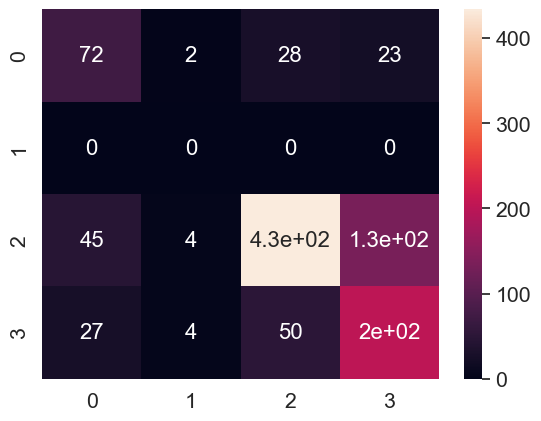

In [17]:
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cm = confusion_matrix(y_pred, y_valid)
print(cm)
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16})# font size

In [18]:
files = []
categories = []

for directory_path in glob.glob('C:/Users/Natalie/Desktop/Project/Alzheimer_s Dataset_1/test/*'):

    label=directory_path.split('\\')[-1]
    
    for img_path in glob.glob(os.path.join(directory_path,'*.jpg')):
        files.append(img_path)
        categories.append(label)

df = pd.DataFrame({
 'Filename': files,
 'Category': categories
})

df

Filename          Category
0     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
1     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
2     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
3     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
4     C:/Users/Natalie/Desktop/Project/Alzheimer_s D...      MildDemented
...                                                 ...               ...
1274  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented
1275  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented
1276  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented
1277  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented
1278  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  VeryMildDemented

[1279 rows x 2 columns]

In [19]:
df.head()

Filename      Category
0  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  MildDemented
1  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  MildDemented
2  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  MildDemented
3  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  MildDemented
4  C:/Users/Natalie/Desktop/Project/Alzheimer_s D...  MildDemented

In [20]:
df['Category'].value_counts()

NonDemented         640
VeryMildDemented    448
MildDemented        179
ModerateDemented     12
Name: Category, dtype: int64

In [21]:
df.shape

(1279, 2)

In [22]:
le = preprocessing.LabelEncoder()
le.fit(df['Category'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}


In [23]:
y = le.transform(df['Category'])

In [24]:
start = time.time()

x_test = []
y_test = y

for f in tqdm(df.Filename[:]):
    img_path = f
    img = load_img(img_path, target_size=(48, 48))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    features_reduce =  features.squeeze()
    x_test.append(features_reduce)

  0%|          | 0/1279 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 2/1279 [00:00<01:16, 16.71it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 4/1279 [00:00<01:16, 16.63it/s]

1/1 [==============================] - 0s 30ms/step


  0%|          | 6/1279 [00:00<01:17, 16.45it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 8/1279 [00:00<01:17, 16.36it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 10/1279 [00:00<01:16, 16.58it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 12/1279 [00:00<01:16, 16.60it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 14/1279 [00:00<01:15, 16.68it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▏         | 16/1279 [00:00<01:15, 16.65it/s]

1/1 [==============================] - 0s 29ms/step


  1%|▏         | 18/1279 [00:01<01:18, 16.11it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 20/1279 [00:01<01:22, 15.22it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 22/1279 [00:01<01:23, 15.11it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 24/1279 [00:01<01:21, 15.42it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 26/1279 [00:01<01:20, 15.60it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 28/1279 [00:01<01:21, 15.44it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 30/1279 [00:01<01:21, 15.29it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 32/1279 [00:02<01:22, 15.16it/s]

1/1 [==============================] - 0s 30ms/step


  3%|▎         | 34/1279 [00:02<01:21, 15.20it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 36/1279 [00:02<01:22, 15.13it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 38/1279 [00:02<01:23, 14.81it/s]

1/1 [==============================] - 0s 31ms/step


  3%|▎         | 40/1279 [00:02<01:23, 14.81it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 42/1279 [00:02<01:23, 14.89it/s]

1/1 [==============================] - 0s 30ms/step


  3%|▎         | 44/1279 [00:02<01:23, 14.88it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▎         | 46/1279 [00:02<01:23, 14.74it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 48/1279 [00:03<01:24, 14.52it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 50/1279 [00:03<01:22, 14.98it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 52/1279 [00:03<01:21, 15.01it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 54/1279 [00:03<01:20, 15.22it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▍         | 56/1279 [00:03<01:18, 15.53it/s]

1/1 [==============================] - 0s 29ms/step


  5%|▍         | 58/1279 [00:03<01:18, 15.46it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▍         | 60/1279 [00:03<01:18, 15.45it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 62/1279 [00:04<01:20, 15.16it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▌         | 64/1279 [00:04<01:25, 14.27it/s]

1/1 [==============================] - 0s 29ms/step


  5%|▌         | 66/1279 [00:04<01:25, 14.19it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 68/1279 [00:04<01:23, 14.51it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 70/1279 [00:04<01:23, 14.42it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 72/1279 [00:04<01:22, 14.68it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 74/1279 [00:04<01:18, 15.37it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 76/1279 [00:04<01:15, 15.86it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 78/1279 [00:05<01:13, 16.26it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▋         | 80/1279 [00:05<01:12, 16.52it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▋         | 82/1279 [00:05<01:11, 16.65it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 84/1279 [00:05<01:11, 16.63it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 86/1279 [00:05<01:10, 16.86it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 88/1279 [00:05<01:09, 17.03it/s]

1/1 [==============================] - 0s 28ms/step


  7%|▋         | 90/1279 [00:05<01:13, 16.16it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 92/1279 [00:05<01:12, 16.32it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 94/1279 [00:06<01:14, 15.96it/s]

1/1 [==============================] - 0s 28ms/step


  8%|▊         | 96/1279 [00:06<01:12, 16.34it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 98/1279 [00:06<01:10, 16.65it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 100/1279 [00:06<01:09, 16.94it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 102/1279 [00:06<01:09, 16.87it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 104/1279 [00:06<01:09, 16.89it/s]

1/1 [==============================] - 0s 30ms/step


  8%|▊         | 106/1279 [00:06<01:09, 16.77it/s]

1/1 [==============================] - 0s 27ms/step


  8%|▊         | 108/1279 [00:06<01:09, 16.84it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▊         | 110/1279 [00:06<01:09, 16.72it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 112/1279 [00:07<01:11, 16.43it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 114/1279 [00:07<01:10, 16.63it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 116/1279 [00:07<01:08, 16.91it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 118/1279 [00:07<01:08, 17.06it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 120/1279 [00:07<01:08, 16.96it/s]

1/1 [==============================] - 0s 27ms/step


 10%|▉         | 122/1279 [00:07<01:08, 16.95it/s]

1/1 [==============================] - 0s 29ms/step


 10%|▉         | 124/1279 [00:07<01:08, 16.92it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 126/1279 [00:07<01:08, 16.82it/s]

1/1 [==============================] - 0s 28ms/step


 10%|█         | 128/1279 [00:08<01:08, 16.83it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 130/1279 [00:08<01:08, 16.73it/s]

1/1 [==============================] - 0s 28ms/step


 10%|█         | 132/1279 [00:08<01:07, 16.89it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 134/1279 [00:08<01:06, 17.09it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 136/1279 [00:08<01:06, 17.11it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 138/1279 [00:08<01:06, 17.12it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 140/1279 [00:08<01:06, 17.12it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 142/1279 [00:08<01:06, 17.22it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█▏        | 144/1279 [00:08<01:06, 17.15it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█▏        | 146/1279 [00:09<01:06, 17.15it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█▏        | 148/1279 [00:09<01:06, 17.10it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 150/1279 [00:09<01:05, 17.21it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 152/1279 [00:09<01:05, 17.19it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 154/1279 [00:09<01:05, 17.17it/s]

1/1 [==============================] - 0s 28ms/step


 12%|█▏        | 156/1279 [00:09<01:06, 16.94it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 158/1279 [00:09<01:05, 17.22it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 160/1279 [00:09<01:05, 17.07it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 162/1279 [00:10<01:05, 17.09it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 164/1279 [00:10<01:04, 17.19it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 166/1279 [00:10<01:04, 17.22it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 168/1279 [00:10<01:04, 17.24it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 170/1279 [00:10<01:03, 17.34it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 172/1279 [00:10<01:03, 17.37it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▎        | 174/1279 [00:10<01:04, 17.21it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 176/1279 [00:10<01:04, 17.17it/s]

1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 178/1279 [00:10<01:03, 17.29it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 180/1279 [00:11<01:03, 17.33it/s]

1/1 [==============================] - 0s 31ms/step


 14%|█▍        | 182/1279 [00:11<01:03, 17.23it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 184/1279 [00:11<01:04, 16.86it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 186/1279 [00:11<01:04, 17.03it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▍        | 188/1279 [00:11<01:03, 17.06it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 190/1279 [00:11<01:03, 17.08it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▌        | 192/1279 [00:11<01:05, 16.63it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▌        | 194/1279 [00:11<01:06, 16.41it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 196/1279 [00:12<01:05, 16.44it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▌        | 198/1279 [00:12<01:04, 16.70it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▌        | 200/1279 [00:12<01:04, 16.79it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 202/1279 [00:12<01:03, 16.94it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▌        | 204/1279 [00:12<01:02, 17.16it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 206/1279 [00:12<01:01, 17.31it/s]

1/1 [==============================] - 0s 37ms/step


 16%|█▋        | 208/1279 [00:12<01:05, 16.47it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▋        | 210/1279 [00:12<01:04, 16.50it/s]

1/1 [==============================] - 0s 26ms/step


 17%|█▋        | 212/1279 [00:12<01:03, 16.85it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 214/1279 [00:13<01:02, 16.94it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 216/1279 [00:13<01:01, 17.17it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 218/1279 [00:13<01:02, 16.99it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 220/1279 [00:13<01:02, 16.82it/s]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 222/1279 [00:13<01:02, 16.83it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 224/1279 [00:13<01:02, 16.96it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 226/1279 [00:13<01:01, 17.12it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 228/1279 [00:13<01:02, 16.92it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 230/1279 [00:14<01:01, 17.07it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 232/1279 [00:14<01:01, 17.03it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 234/1279 [00:14<01:02, 16.78it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 236/1279 [00:14<01:02, 16.80it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▊        | 238/1279 [00:14<01:03, 16.49it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 240/1279 [00:14<01:03, 16.31it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 242/1279 [00:14<01:03, 16.35it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 244/1279 [00:14<01:02, 16.46it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 246/1279 [00:15<01:03, 16.37it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 248/1279 [00:15<01:02, 16.51it/s]

1/1 [==============================] - 0s 29ms/step


 20%|█▉        | 250/1279 [00:15<01:04, 15.86it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 252/1279 [00:15<01:02, 16.30it/s]

1/1 [==============================] - 0s 27ms/step


 20%|█▉        | 254/1279 [00:15<01:02, 16.30it/s]

1/1 [==============================] - 0s 31ms/step


 20%|██        | 256/1279 [00:15<01:02, 16.30it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 258/1279 [00:15<01:01, 16.55it/s]

1/1 [==============================] - 0s 29ms/step


 20%|██        | 260/1279 [00:15<01:01, 16.59it/s]

1/1 [==============================] - 0s 27ms/step


 20%|██        | 262/1279 [00:15<01:00, 16.84it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 264/1279 [00:16<01:00, 16.72it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 266/1279 [00:16<01:00, 16.76it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 268/1279 [00:16<00:59, 16.91it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██        | 270/1279 [00:16<00:59, 16.98it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██▏       | 272/1279 [00:16<00:58, 17.11it/s]

1/1 [==============================] - 0s 34ms/step


 21%|██▏       | 274/1279 [00:16<01:01, 16.31it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 276/1279 [00:16<01:01, 16.33it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 278/1279 [00:16<01:01, 16.16it/s]

1/1 [==============================] - 0s 27ms/step


 22%|██▏       | 280/1279 [00:17<01:01, 16.36it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 282/1279 [00:17<01:02, 15.92it/s]

1/1 [==============================] - 0s 33ms/step


 22%|██▏       | 284/1279 [00:17<01:05, 15.12it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 286/1279 [00:17<01:07, 14.71it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 288/1279 [00:17<01:06, 14.99it/s]

1/1 [==============================] - 0s 53ms/step


 23%|██▎       | 290/1279 [00:17<01:09, 14.25it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 292/1279 [00:17<01:10, 14.09it/s]

1/1 [==============================] - 0s 29ms/step


 23%|██▎       | 294/1279 [00:18<01:09, 14.25it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 296/1279 [00:18<01:06, 14.85it/s]

1/1 [==============================] - 0s 29ms/step


 23%|██▎       | 298/1279 [00:18<01:05, 15.09it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 300/1279 [00:18<01:05, 15.05it/s]

1/1 [==============================] - 0s 29ms/step


 24%|██▎       | 302/1279 [00:18<01:04, 15.09it/s]

1/1 [==============================] - 0s 30ms/step


 24%|██▍       | 304/1279 [00:18<01:04, 15.12it/s]

1/1 [==============================] - 0s 28ms/step


 24%|██▍       | 306/1279 [00:18<01:03, 15.32it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▍       | 308/1279 [00:18<01:05, 14.84it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▍       | 310/1279 [00:19<01:07, 14.30it/s]

1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 312/1279 [00:19<01:09, 13.93it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██▍       | 314/1279 [00:19<01:08, 14.08it/s]

1/1 [==============================] - 0s 36ms/step


 25%|██▍       | 316/1279 [00:19<01:09, 13.91it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▍       | 318/1279 [00:19<01:08, 14.00it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██▌       | 320/1279 [00:19<01:12, 13.26it/s]

1/1 [==============================] - 0s 36ms/step


 25%|██▌       | 322/1279 [00:20<01:12, 13.19it/s]

1/1 [==============================] - 0s 35ms/step


 25%|██▌       | 324/1279 [00:20<01:12, 13.17it/s]

1/1 [==============================] - 0s 29ms/step


 25%|██▌       | 326/1279 [00:20<01:08, 13.97it/s]

1/1 [==============================] - 0s 28ms/step


 26%|██▌       | 328/1279 [00:20<01:05, 14.53it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 330/1279 [00:20<01:04, 14.73it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██▌       | 332/1279 [00:20<01:04, 14.70it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 334/1279 [00:20<01:04, 14.68it/s]

1/1 [==============================] - 0s 29ms/step


 26%|██▋       | 336/1279 [00:20<01:02, 15.15it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▋       | 338/1279 [00:21<01:00, 15.49it/s]

1/1 [==============================] - 0s 33ms/step


 27%|██▋       | 340/1279 [00:21<01:00, 15.54it/s]

1/1 [==============================] - 0s 32ms/step


 27%|██▋       | 342/1279 [00:21<01:00, 15.37it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 344/1279 [00:21<00:59, 15.71it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 346/1279 [00:21<00:59, 15.81it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 348/1279 [00:21<00:59, 15.73it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 350/1279 [00:21<00:58, 16.01it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 352/1279 [00:21<00:58, 15.83it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 354/1279 [00:22<00:58, 15.69it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 356/1279 [00:22<00:59, 15.61it/s]

1/1 [==============================] - 0s 32ms/step


 28%|██▊       | 358/1279 [00:22<00:58, 15.68it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 360/1279 [00:22<00:59, 15.57it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 362/1279 [00:22<00:58, 15.64it/s]

1/1 [==============================] - 0s 30ms/step


 28%|██▊       | 364/1279 [00:22<00:58, 15.69it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▊       | 366/1279 [00:22<00:58, 15.50it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▉       | 368/1279 [00:23<00:58, 15.59it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 370/1279 [00:23<00:58, 15.43it/s]

1/1 [==============================] - 0s 32ms/step


 29%|██▉       | 372/1279 [00:23<00:59, 15.32it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 374/1279 [00:23<01:00, 15.08it/s]

1/1 [==============================] - 0s 27ms/step


 29%|██▉       | 376/1279 [00:23<00:59, 15.28it/s]

1/1 [==============================] - 0s 34ms/step


 30%|██▉       | 378/1279 [00:23<00:58, 15.43it/s]

1/1 [==============================] - 0s 29ms/step


 30%|██▉       | 380/1279 [00:23<00:58, 15.45it/s]

1/1 [==============================] - 0s 33ms/step


 30%|██▉       | 382/1279 [00:23<01:00, 14.83it/s]

1/1 [==============================] - 0s 27ms/step


 30%|███       | 384/1279 [00:24<00:59, 15.00it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 386/1279 [00:24<00:58, 15.34it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 388/1279 [00:24<00:56, 15.65it/s]

1/1 [==============================] - 0s 28ms/step


 30%|███       | 390/1279 [00:24<00:57, 15.44it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 392/1279 [00:24<00:56, 15.61it/s]

1/1 [==============================] - 0s 28ms/step


 31%|███       | 394/1279 [00:24<00:56, 15.70it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 396/1279 [00:24<00:55, 15.80it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 398/1279 [00:24<00:56, 15.69it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███▏      | 400/1279 [00:25<00:57, 15.23it/s]

1/1 [==============================] - 0s 37ms/step


 31%|███▏      | 402/1279 [00:25<00:58, 14.88it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 404/1279 [00:25<01:04, 13.55it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 406/1279 [00:25<01:02, 14.00it/s]

1/1 [==============================] - 0s 27ms/step


 32%|███▏      | 408/1279 [00:25<00:59, 14.65it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 410/1279 [00:25<00:56, 15.32it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 412/1279 [00:25<00:55, 15.64it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 414/1279 [00:26<00:55, 15.61it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 416/1279 [00:26<00:53, 16.12it/s]

1/1 [==============================] - 0s 29ms/step


 33%|███▎      | 418/1279 [00:26<00:53, 16.13it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 420/1279 [00:26<00:52, 16.42it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 422/1279 [00:26<00:51, 16.71it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 424/1279 [00:26<00:50, 16.86it/s]

1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 426/1279 [00:26<00:51, 16.65it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 428/1279 [00:26<00:55, 15.44it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▎      | 430/1279 [00:27<00:53, 15.72it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▍      | 432/1279 [00:27<00:52, 16.01it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 434/1279 [00:27<00:52, 16.17it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 436/1279 [00:27<00:51, 16.37it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 438/1279 [00:27<00:50, 16.68it/s]

1/1 [==============================] - 0s 27ms/step


 34%|███▍      | 440/1279 [00:27<00:49, 16.91it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▍      | 442/1279 [00:27<00:49, 16.98it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▍      | 444/1279 [00:27<00:50, 16.64it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▍      | 446/1279 [00:27<00:49, 16.68it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 448/1279 [00:28<00:50, 16.43it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▌      | 450/1279 [00:28<00:50, 16.54it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 452/1279 [00:28<00:49, 16.83it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 454/1279 [00:28<00:49, 16.65it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 456/1279 [00:28<00:51, 15.91it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▌      | 458/1279 [00:28<00:51, 15.88it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 460/1279 [00:28<00:52, 15.70it/s]

1/1 [==============================] - 0s 31ms/step


 36%|███▌      | 462/1279 [00:28<00:52, 15.69it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▋      | 464/1279 [00:29<00:52, 15.50it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▋      | 466/1279 [00:29<00:51, 15.70it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 468/1279 [00:29<00:51, 15.87it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 470/1279 [00:29<00:50, 16.08it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 472/1279 [00:29<00:51, 15.78it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 474/1279 [00:29<00:50, 15.88it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 476/1279 [00:29<00:50, 15.81it/s]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 478/1279 [00:29<00:50, 15.88it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 480/1279 [00:30<00:50, 15.73it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 482/1279 [00:30<00:49, 16.15it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 484/1279 [00:30<00:49, 16.15it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 486/1279 [00:30<00:48, 16.43it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 488/1279 [00:30<00:47, 16.52it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 490/1279 [00:30<00:47, 16.49it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 492/1279 [00:30<00:47, 16.43it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▊      | 494/1279 [00:30<00:47, 16.44it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 496/1279 [00:31<00:47, 16.40it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 498/1279 [00:31<00:47, 16.33it/s]

1/1 [==============================] - 0s 27ms/step


 39%|███▉      | 500/1279 [00:31<00:47, 16.56it/s]

1/1 [==============================] - 0s 28ms/step


 39%|███▉      | 502/1279 [00:31<00:47, 16.43it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 504/1279 [00:31<00:49, 15.70it/s]

1/1 [==============================] - 0s 31ms/step


 40%|███▉      | 506/1279 [00:31<00:49, 15.52it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███▉      | 508/1279 [00:31<00:49, 15.68it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 510/1279 [00:31<00:47, 16.04it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 512/1279 [00:32<00:46, 16.34it/s]

1/1 [==============================] - 0s 27ms/step


 40%|████      | 514/1279 [00:32<00:46, 16.51it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 516/1279 [00:32<00:46, 16.47it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 518/1279 [00:32<00:45, 16.58it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 520/1279 [00:32<00:45, 16.74it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████      | 522/1279 [00:32<00:45, 16.82it/s]

1/1 [==============================] - 0s 26ms/step


 41%|████      | 524/1279 [00:32<00:44, 16.87it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████      | 526/1279 [00:32<00:45, 16.65it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████▏     | 528/1279 [00:33<00:46, 16.31it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████▏     | 530/1279 [00:33<00:47, 15.88it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 532/1279 [00:33<00:47, 15.63it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 534/1279 [00:33<00:49, 15.06it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 536/1279 [00:33<00:49, 15.06it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 538/1279 [00:33<00:48, 15.20it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 540/1279 [00:33<00:48, 15.27it/s]

1/1 [==============================] - 0s 29ms/step


 42%|████▏     | 542/1279 [00:33<00:48, 15.21it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 544/1279 [00:34<00:48, 15.14it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 546/1279 [00:34<00:48, 15.15it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 548/1279 [00:34<00:48, 15.10it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 550/1279 [00:34<00:49, 14.79it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 552/1279 [00:34<00:51, 14.15it/s]

1/1 [==============================] - 0s 29ms/step


 43%|████▎     | 554/1279 [00:34<00:50, 14.26it/s]

1/1 [==============================] - 0s 30ms/step


 43%|████▎     | 556/1279 [00:34<00:49, 14.66it/s]

1/1 [==============================] - 0s 35ms/step


 44%|████▎     | 558/1279 [00:35<00:51, 14.12it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 560/1279 [00:35<00:49, 14.42it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 562/1279 [00:35<00:50, 14.30it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 564/1279 [00:35<00:49, 14.53it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 566/1279 [00:35<00:49, 14.44it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 568/1279 [00:35<00:49, 14.50it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 570/1279 [00:35<00:48, 14.57it/s]

1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 572/1279 [00:36<00:48, 14.46it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 574/1279 [00:36<00:48, 14.48it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▌     | 576/1279 [00:36<00:47, 14.66it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 578/1279 [00:36<00:46, 14.98it/s]

1/1 [==============================] - 0s 29ms/step


 45%|████▌     | 580/1279 [00:36<00:46, 15.01it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▌     | 582/1279 [00:36<00:46, 14.91it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 584/1279 [00:36<00:46, 14.89it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▌     | 586/1279 [00:36<00:44, 15.45it/s]

1/1 [==============================] - 0s 31ms/step


 46%|████▌     | 588/1279 [00:37<00:44, 15.48it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 590/1279 [00:37<00:43, 15.87it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▋     | 592/1279 [00:37<00:42, 16.15it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▋     | 594/1279 [00:37<00:41, 16.43it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 596/1279 [00:37<00:41, 16.64it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 598/1279 [00:37<00:54, 12.44it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 600/1279 [00:37<00:49, 13.58it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 602/1279 [00:38<00:47, 14.24it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 604/1279 [00:38<00:44, 15.07it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 606/1279 [00:38<00:43, 15.56it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 608/1279 [00:38<00:41, 15.99it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 610/1279 [00:38<00:41, 16.30it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 612/1279 [00:38<00:40, 16.51it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 614/1279 [00:38<00:39, 16.74it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 616/1279 [00:38<00:39, 16.73it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 618/1279 [00:38<00:39, 16.94it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 620/1279 [00:39<00:38, 17.00it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▊     | 622/1279 [00:39<00:38, 17.04it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 624/1279 [00:39<00:38, 16.90it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 626/1279 [00:39<00:38, 17.01it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 628/1279 [00:39<00:38, 17.05it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 630/1279 [00:39<00:38, 16.99it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 632/1279 [00:39<00:37, 17.12it/s]

1/1 [==============================] - 0s 27ms/step


 50%|████▉     | 634/1279 [00:39<00:37, 17.08it/s]

1/1 [==============================] - 0s 27ms/step


 50%|████▉     | 636/1279 [00:40<00:37, 17.14it/s]

1/1 [==============================] - 0s 26ms/step


 50%|████▉     | 638/1279 [00:40<00:37, 17.19it/s]

1/1 [==============================] - 0s 27ms/step


 50%|█████     | 640/1279 [00:40<00:37, 17.12it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 642/1279 [00:40<00:37, 16.88it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 644/1279 [00:40<00:37, 16.83it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 646/1279 [00:40<00:37, 16.96it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 648/1279 [00:40<00:36, 17.10it/s]

1/1 [==============================] - 0s 30ms/step


 51%|█████     | 650/1279 [00:40<00:37, 16.94it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 652/1279 [00:40<00:37, 16.83it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 654/1279 [00:41<00:36, 16.92it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████▏    | 656/1279 [00:41<00:36, 16.86it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████▏    | 658/1279 [00:41<00:36, 16.94it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 660/1279 [00:41<00:37, 16.66it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 662/1279 [00:41<00:36, 16.72it/s]

1/1 [==============================] - 0s 31ms/step


 52%|█████▏    | 664/1279 [00:41<00:37, 16.51it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 666/1279 [00:41<00:37, 16.25it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 668/1279 [00:41<00:37, 16.33it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 670/1279 [00:42<00:38, 15.97it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 672/1279 [00:42<00:38, 15.88it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 674/1279 [00:42<00:36, 16.39it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 676/1279 [00:42<00:36, 16.45it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 678/1279 [00:42<00:36, 16.57it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 680/1279 [00:42<00:35, 16.67it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 682/1279 [00:42<00:35, 16.64it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 684/1279 [00:42<00:35, 16.87it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▎    | 686/1279 [00:43<00:34, 16.95it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 688/1279 [00:43<00:35, 16.88it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 690/1279 [00:43<00:34, 17.04it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 692/1279 [00:43<00:34, 17.16it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 694/1279 [00:43<00:34, 16.89it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 696/1279 [00:43<00:34, 16.80it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▍    | 698/1279 [00:43<00:34, 16.85it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▍    | 700/1279 [00:43<00:34, 16.90it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 702/1279 [00:43<00:33, 17.03it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▌    | 704/1279 [00:44<00:33, 17.13it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▌    | 706/1279 [00:44<00:33, 16.95it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▌    | 708/1279 [00:44<00:34, 16.79it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 710/1279 [00:44<00:35, 15.97it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 712/1279 [00:44<00:35, 16.18it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 714/1279 [00:44<00:35, 16.14it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 716/1279 [00:44<00:35, 15.88it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 718/1279 [00:44<00:34, 16.08it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▋    | 720/1279 [00:45<00:34, 16.39it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▋    | 722/1279 [00:45<00:33, 16.58it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 724/1279 [00:45<00:33, 16.67it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 726/1279 [00:45<00:32, 16.89it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 728/1279 [00:45<00:32, 17.01it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 730/1279 [00:45<00:32, 17.03it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 732/1279 [00:45<00:32, 16.98it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 734/1279 [00:45<00:32, 16.81it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 736/1279 [00:46<00:32, 16.91it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 738/1279 [00:46<00:32, 16.81it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 740/1279 [00:46<00:32, 16.82it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 742/1279 [00:46<00:32, 16.62it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 744/1279 [00:46<00:32, 16.48it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 746/1279 [00:46<00:32, 16.37it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 748/1279 [00:46<00:32, 16.38it/s]

1/1 [==============================] - 0s 27ms/step


 59%|█████▊    | 750/1279 [00:46<00:32, 16.14it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 752/1279 [00:47<00:32, 16.27it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 754/1279 [00:47<00:32, 16.36it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 756/1279 [00:47<00:31, 16.69it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 758/1279 [00:47<00:31, 16.58it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 760/1279 [00:47<00:31, 16.45it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 762/1279 [00:47<00:31, 16.36it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 764/1279 [00:47<00:31, 16.19it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 766/1279 [00:47<00:31, 16.30it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 768/1279 [00:47<00:31, 16.38it/s]

1/1 [==============================] - 0s 30ms/step


 60%|██████    | 770/1279 [00:48<00:31, 16.12it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 772/1279 [00:48<00:31, 15.94it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 774/1279 [00:48<00:31, 16.25it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 776/1279 [00:48<00:30, 16.34it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 778/1279 [00:48<00:30, 16.51it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 780/1279 [00:48<00:29, 16.82it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 782/1279 [00:48<00:29, 17.00it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████▏   | 784/1279 [00:48<00:29, 16.55it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████▏   | 786/1279 [00:49<00:30, 16.23it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 788/1279 [00:49<00:30, 15.98it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 790/1279 [00:49<00:30, 15.88it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 792/1279 [00:49<00:30, 15.89it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 794/1279 [00:49<00:30, 15.75it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 796/1279 [00:49<00:30, 15.73it/s]

1/1 [==============================] - 0s 27ms/step


 62%|██████▏   | 798/1279 [00:49<00:30, 15.82it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 800/1279 [00:49<00:30, 15.77it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 802/1279 [00:50<00:29, 16.02it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 804/1279 [00:50<00:30, 15.79it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 806/1279 [00:50<00:29, 15.77it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 808/1279 [00:50<00:29, 15.70it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 810/1279 [00:50<00:29, 15.66it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 812/1279 [00:50<00:29, 15.63it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▎   | 814/1279 [00:50<00:30, 15.43it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 816/1279 [00:51<00:30, 15.42it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 818/1279 [00:51<00:29, 15.39it/s]

1/1 [==============================] - 0s 32ms/step


 64%|██████▍   | 820/1279 [00:51<00:29, 15.36it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 822/1279 [00:51<00:30, 14.87it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▍   | 824/1279 [00:51<00:30, 14.90it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▍   | 826/1279 [00:51<00:30, 14.92it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 828/1279 [00:51<00:29, 15.17it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▍   | 830/1279 [00:51<00:29, 15.28it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 832/1279 [00:52<00:29, 15.15it/s]

1/1 [==============================] - 0s 29ms/step


 65%|██████▌   | 834/1279 [00:52<00:29, 15.34it/s]

1/1 [==============================] - 0s 33ms/step


 65%|██████▌   | 836/1279 [00:52<00:29, 15.26it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 838/1279 [00:52<00:29, 15.12it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▌   | 840/1279 [00:52<00:29, 14.91it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 842/1279 [00:52<00:28, 15.33it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▌   | 844/1279 [00:52<00:27, 15.76it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 846/1279 [00:52<00:27, 16.00it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▋   | 848/1279 [00:53<00:27, 15.93it/s]

1/1 [==============================] - 0s 30ms/step


 66%|██████▋   | 850/1279 [00:53<00:27, 15.70it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 852/1279 [00:53<00:26, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 854/1279 [00:53<00:26, 16.23it/s]

1/1 [==============================] - 0s 29ms/step


 67%|██████▋   | 856/1279 [00:53<00:25, 16.29it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 858/1279 [00:53<00:25, 16.41it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 860/1279 [00:53<00:25, 16.53it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 862/1279 [00:53<00:25, 16.65it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 864/1279 [00:54<00:24, 16.71it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 866/1279 [00:54<00:25, 16.50it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 868/1279 [00:54<00:26, 15.45it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 870/1279 [00:54<00:25, 15.85it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 872/1279 [00:54<00:25, 16.18it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 874/1279 [00:54<00:24, 16.45it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 876/1279 [00:54<00:24, 16.57it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▊   | 878/1279 [00:54<00:24, 16.70it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 880/1279 [00:55<00:23, 16.93it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 882/1279 [00:55<00:23, 16.88it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 884/1279 [00:55<00:23, 16.89it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 886/1279 [00:55<00:23, 16.68it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 888/1279 [00:55<00:23, 16.69it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 890/1279 [00:55<00:23, 16.78it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 892/1279 [00:55<00:22, 16.93it/s]

1/1 [==============================] - 0s 27ms/step


 70%|██████▉   | 894/1279 [00:55<00:22, 16.78it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 896/1279 [00:55<00:22, 16.76it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 898/1279 [00:56<00:22, 16.79it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 900/1279 [00:56<00:22, 16.76it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 902/1279 [00:56<00:22, 16.92it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 904/1279 [00:56<00:22, 16.65it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 906/1279 [00:56<00:22, 16.62it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 908/1279 [00:56<00:22, 16.78it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 910/1279 [00:56<00:21, 16.81it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████▏  | 912/1279 [00:56<00:22, 16.57it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████▏  | 914/1279 [00:57<00:22, 16.09it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 916/1279 [00:57<00:22, 16.27it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 918/1279 [00:57<00:21, 16.52it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 920/1279 [00:57<00:21, 16.50it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 922/1279 [00:57<00:21, 16.44it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 924/1279 [00:57<00:21, 16.64it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 926/1279 [00:57<00:21, 16.62it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 928/1279 [00:57<00:20, 16.77it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 930/1279 [00:58<00:21, 16.47it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 932/1279 [00:58<00:20, 16.62it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 934/1279 [00:58<00:20, 16.86it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 936/1279 [00:58<00:20, 16.90it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 938/1279 [00:58<00:20, 16.76it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 940/1279 [00:58<00:20, 16.62it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▎  | 942/1279 [00:58<00:20, 16.65it/s]

1/1 [==============================] - 0s 35ms/step


 74%|███████▍  | 944/1279 [00:58<00:20, 16.14it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 946/1279 [00:59<00:20, 16.00it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 948/1279 [00:59<00:21, 15.71it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 950/1279 [00:59<00:20, 15.77it/s]

1/1 [==============================] - 0s 29ms/step


 74%|███████▍  | 952/1279 [00:59<00:20, 15.74it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 954/1279 [00:59<00:20, 15.72it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 956/1279 [00:59<00:20, 15.85it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 958/1279 [00:59<00:20, 15.90it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 960/1279 [00:59<00:19, 16.10it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 962/1279 [01:00<00:19, 16.12it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 964/1279 [01:00<00:19, 16.02it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 966/1279 [01:00<00:19, 16.06it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 968/1279 [01:00<00:19, 16.29it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 970/1279 [01:00<00:18, 16.54it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 972/1279 [01:00<00:18, 16.59it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 974/1279 [01:00<00:18, 16.68it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▋  | 976/1279 [01:00<00:18, 16.70it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▋  | 978/1279 [01:00<00:17, 16.83it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 980/1279 [01:01<00:17, 16.79it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 982/1279 [01:01<00:17, 16.87it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 984/1279 [01:01<00:17, 16.76it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 986/1279 [01:01<00:17, 16.50it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 988/1279 [01:01<00:17, 16.24it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 990/1279 [01:01<00:17, 16.10it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 992/1279 [01:01<00:17, 16.36it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 994/1279 [01:01<00:17, 16.46it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 996/1279 [01:02<00:17, 16.62it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 998/1279 [01:02<00:16, 16.56it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 1000/1279 [01:02<00:16, 16.44it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 1002/1279 [01:02<00:16, 16.40it/s]

1/1 [==============================] - 0s 34ms/step


 78%|███████▊  | 1004/1279 [01:02<00:16, 16.21it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▊  | 1006/1279 [01:02<00:16, 16.24it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 1008/1279 [01:02<00:16, 16.22it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▉  | 1010/1279 [01:02<00:16, 16.36it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 1012/1279 [01:03<00:16, 16.39it/s]

1/1 [==============================] - 0s 26ms/step


 79%|███████▉  | 1014/1279 [01:03<00:15, 16.56it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 1016/1279 [01:03<00:16, 16.40it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 1018/1279 [01:03<00:16, 16.18it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 1020/1279 [01:03<00:15, 16.25it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 1022/1279 [01:03<00:15, 16.27it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 1024/1279 [01:03<00:15, 16.28it/s]

1/1 [==============================] - 0s 29ms/step


 80%|████████  | 1026/1279 [01:03<00:15, 16.41it/s]

1/1 [==============================] - 0s 28ms/step


 80%|████████  | 1028/1279 [01:04<00:15, 16.41it/s]

1/1 [==============================] - 0s 40ms/step


 81%|████████  | 1030/1279 [01:04<00:16, 15.38it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 1032/1279 [01:04<00:15, 15.68it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████  | 1034/1279 [01:04<00:15, 15.94it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 1036/1279 [01:04<00:15, 16.09it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 1038/1279 [01:04<00:14, 16.19it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████▏ | 1040/1279 [01:04<00:14, 16.38it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████▏ | 1042/1279 [01:04<00:14, 16.56it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 1044/1279 [01:05<00:14, 16.57it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 1046/1279 [01:05<00:14, 16.37it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 1048/1279 [01:05<00:14, 15.83it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 1050/1279 [01:05<00:14, 15.27it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 1052/1279 [01:05<00:14, 15.64it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 1054/1279 [01:05<00:14, 15.67it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 1056/1279 [01:05<00:14, 15.20it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 1058/1279 [01:05<00:14, 15.23it/s]

1/1 [==============================] - 0s 36ms/step


 83%|████████▎ | 1060/1279 [01:06<00:14, 14.78it/s]

1/1 [==============================] - 0s 34ms/step


 83%|████████▎ | 1062/1279 [01:06<00:14, 14.68it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 1064/1279 [01:06<00:15, 14.23it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 1066/1279 [01:06<00:15, 13.99it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▎ | 1068/1279 [01:06<00:14, 14.39it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▎ | 1070/1279 [01:06<00:14, 14.86it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 1072/1279 [01:06<00:13, 15.06it/s]

1/1 [==============================] - 0s 40ms/step


 84%|████████▍ | 1074/1279 [01:07<00:14, 14.12it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▍ | 1076/1279 [01:07<00:14, 13.76it/s]

1/1 [==============================] - 0s 29ms/step


 84%|████████▍ | 1078/1279 [01:07<00:14, 13.92it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▍ | 1080/1279 [01:07<00:14, 13.45it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▍ | 1082/1279 [01:07<00:14, 13.51it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▍ | 1084/1279 [01:07<00:14, 13.36it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 1086/1279 [01:07<00:14, 13.63it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 1088/1279 [01:08<00:14, 13.36it/s]

1/1 [==============================] - 0s 39ms/step


 85%|████████▌ | 1090/1279 [01:08<00:14, 13.15it/s]

1/1 [==============================] - 0s 28ms/step


 85%|████████▌ | 1092/1279 [01:08<00:14, 13.28it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 1094/1279 [01:08<00:13, 13.44it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 1096/1279 [01:08<00:13, 13.92it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 1098/1279 [01:08<00:12, 14.04it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 1100/1279 [01:09<00:12, 13.83it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 1102/1279 [01:09<00:12, 14.24it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▋ | 1104/1279 [01:09<00:11, 14.64it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▋ | 1106/1279 [01:09<00:11, 14.90it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 1108/1279 [01:09<00:11, 15.02it/s]

1/1 [==============================] - 0s 36ms/step


 87%|████████▋ | 1110/1279 [01:09<00:11, 14.89it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 1112/1279 [01:09<00:11, 15.01it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 1114/1279 [01:09<00:11, 14.90it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 1116/1279 [01:10<00:11, 14.37it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 1118/1279 [01:10<00:11, 14.10it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 1120/1279 [01:10<00:11, 14.44it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 1122/1279 [01:10<00:10, 14.56it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 1124/1279 [01:10<00:10, 14.78it/s]

1/1 [==============================] - 0s 28ms/step


 88%|████████▊ | 1126/1279 [01:10<00:10, 15.00it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 1128/1279 [01:10<00:09, 15.12it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 1130/1279 [01:11<00:09, 15.25it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▊ | 1132/1279 [01:11<00:09, 15.44it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▊ | 1134/1279 [01:11<00:09, 15.38it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 1136/1279 [01:11<00:09, 14.69it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 1138/1279 [01:11<00:09, 14.91it/s]

1/1 [==============================] - 0s 30ms/step


 89%|████████▉ | 1140/1279 [01:11<00:09, 15.02it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▉ | 1142/1279 [01:11<00:09, 14.92it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 1144/1279 [01:11<00:08, 15.07it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 1146/1279 [01:12<00:08, 15.28it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 1148/1279 [01:12<00:08, 15.57it/s]

1/1 [==============================] - 0s 32ms/step


 90%|████████▉ | 1150/1279 [01:12<00:08, 15.35it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 1152/1279 [01:12<00:08, 15.27it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 1154/1279 [01:12<00:08, 15.53it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 1156/1279 [01:12<00:07, 15.61it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 1158/1279 [01:12<00:07, 15.66it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 1160/1279 [01:12<00:07, 15.97it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 1162/1279 [01:13<00:07, 15.96it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 1164/1279 [01:13<00:07, 15.50it/s]

1/1 [==============================] - 0s 31ms/step


 91%|█████████ | 1166/1279 [01:13<00:07, 15.44it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████▏| 1168/1279 [01:13<00:07, 14.95it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████▏| 1170/1279 [01:13<00:07, 15.30it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 1172/1279 [01:13<00:06, 15.59it/s]

1/1 [==============================] - 0s 32ms/step


 92%|█████████▏| 1174/1279 [01:13<00:06, 15.43it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 1176/1279 [01:14<00:06, 15.50it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 1178/1279 [01:14<00:06, 15.62it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 1180/1279 [01:14<00:06, 15.56it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 1182/1279 [01:14<00:06, 15.19it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 1184/1279 [01:14<00:06, 14.95it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 1186/1279 [01:14<00:06, 15.16it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 1188/1279 [01:14<00:06, 15.13it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 1190/1279 [01:14<00:05, 15.56it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 1192/1279 [01:15<00:05, 15.55it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 1194/1279 [01:15<00:05, 15.59it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▎| 1196/1279 [01:15<00:05, 15.65it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▎| 1198/1279 [01:15<00:05, 15.23it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 1200/1279 [01:15<00:05, 14.49it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 1202/1279 [01:15<00:05, 14.44it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 1204/1279 [01:15<00:04, 15.07it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 1206/1279 [01:15<00:04, 15.26it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▍| 1208/1279 [01:16<00:04, 14.83it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 1210/1279 [01:16<00:04, 14.84it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 1212/1279 [01:16<00:04, 14.78it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 1214/1279 [01:16<00:04, 14.62it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▌| 1216/1279 [01:16<00:04, 14.89it/s]

1/1 [==============================] - 0s 31ms/step


 95%|█████████▌| 1218/1279 [01:16<00:04, 14.91it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 1220/1279 [01:16<00:03, 15.27it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 1222/1279 [01:17<00:03, 15.21it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 1224/1279 [01:17<00:03, 15.24it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 1226/1279 [01:17<00:03, 15.09it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 1228/1279 [01:17<00:03, 14.94it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▌| 1230/1279 [01:17<00:03, 14.84it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▋| 1232/1279 [01:17<00:03, 14.83it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▋| 1234/1279 [01:17<00:03, 14.97it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 1236/1279 [01:17<00:02, 15.19it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 1238/1279 [01:18<00:02, 15.06it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 1240/1279 [01:18<00:02, 15.00it/s]

1/1 [==============================] - 0s 31ms/step


 97%|█████████▋| 1242/1279 [01:18<00:02, 14.89it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 1244/1279 [01:18<00:02, 14.68it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 1246/1279 [01:18<00:02, 14.23it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 1248/1279 [01:18<00:02, 14.26it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 1250/1279 [01:18<00:01, 14.56it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 1252/1279 [01:19<00:01, 14.58it/s]

1/1 [==============================] - 0s 32ms/step


 98%|█████████▊| 1254/1279 [01:19<00:01, 14.33it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 1256/1279 [01:19<00:01, 14.67it/s]

1/1 [==============================] - 0s 29ms/step


 98%|█████████▊| 1258/1279 [01:19<00:01, 14.91it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▊| 1260/1279 [01:19<00:01, 14.83it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▊| 1262/1279 [01:19<00:01, 15.07it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 1264/1279 [01:19<00:00, 15.22it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 1266/1279 [01:20<00:00, 15.57it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 1268/1279 [01:20<00:00, 15.21it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 1270/1279 [01:20<00:00, 15.52it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 1272/1279 [01:20<00:00, 15.46it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 1274/1279 [01:20<00:00, 15.59it/s]

1/1 [==============================] - 0s 31ms/step


100%|█████████▉| 1276/1279 [01:20<00:00, 15.66it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 1278/1279 [01:20<00:00, 15.74it/s]

1/1 [==============================] - 0s 29ms/step


100%|██████████| 1279/1279 [01:20<00:00, 15.82it/s]


In [25]:
x_test = pd.DataFrame(x_test)

In [26]:
x_test.head()

0    1    2    3    4    5    6    7    8    9    ...  502  503  504  505  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

         506  507  508  509  510  511  
0   0.000000  0.0  0.0  0.0  0.0  0.0  
1   8.247432  0.0  0.0  0.0  0.0  0.0  
2  18.454372  0.0  0.0  0.0  0.0  0.0  
3   8.135006  0.0  0.0  0.0  0.0  0.0  
4   0.000000  0.0  0.0  0.0  0.0  0.0  

[5 rows x 512 columns]

In [27]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_test = scaler.transform(x_test)

In [28]:
x_test.shape

(1279, 512)

In [29]:
y_pred = clf.predict(x_test)

In [30]:
print(accuracy_score(y_pred, y_test))
print(f1_score(y_pred, y_test, average="macro"))

0.5230648944487881
0.2730410362937256


In [31]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test,y_pred, average="macro")
recall = recall_score(y_test,y_pred, average="macro")
 
print('Precision: ',precision)
print('Recall: ',recall)

Precision:  0.330831251408361
Recall:  0.29282783818834796


C:\Users\Natalie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
